This dataset contains Bank marketing campaign data and we can use it to optimize bank marketing campaigns to attract more customers to term deposit subscription.
Finding out customer segments, using data for customers, whoever subscribed to term deposit. This helps to identify the profile of a customer, who is more likely to acquire the product and develop more targeted marketing campaigns.

# Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

# Import Data


Since data is in form of a csv file  so we have to use “pandas.read_csv” to load the data to perform analysis

In [2]:
df=pd.read_csv("D:/bank-additional/bank-additional-full.csv",sep=";")

In [3]:
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

# Fetching first five rows

In [4]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

# Fetching last five rows

In [5]:
df.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

# Shape of data

In [6]:
df.shape

(41188, 21)

observation:-

Total number of rows = 45211 and
Ttotal number of columns = 17

# To get the data information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Checking all the columns available in dataset

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
df['job'].dtypes

dtype('O')

In [10]:
df['job'].dtypes=='O'

True

# Categorical value

In [11]:
cat_col = [fea for fea in df.columns if df[fea].dtype == 'O']

In [12]:
df[cat_col].head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no

In [13]:
num_col = [fea for fea in df.columns if df[fea].dtype != 'O']

In [14]:
df[num_col].head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0

# Missing value

In [15]:
df.isnull()

age    job  marital  education  default  housing   loan  contact  \
0      False  False    False      False    False    False  False    False   
1      False  False    False      False    False    False  False    False   
2      False  False    False      False    False    False  False    False   
3      False  False    False      False    False    False  False    False   
4      False  False    False      False    False    False  False    False   
...      ...    ...      ...        ...      ...      ...    ...      ...   
41183  False  False    False      False    False    False  False    False   
41184  False  False    False      False    False    False  False    False   
41185  False  False    False      False    False    False  False    False   
41186  False  False    False      False    False    False  False    False   
41187  False  False    False      False    False    False  False    False   

       month  day_of_week  ...  campaign  pdays  previous  poutcome  \
0      False        False  ...     False  False     False     False   
1      False        False  ...     False  False     False     False   
2      False        False  ...     False  False     False     False   
3      False        False  ...     False  False     False     False   
4      False        False  ...     False  False     False     False   
...      ...          ...  ...       ...    ...       ...       ...   
41183  False        False  ...     False  False     False     False   
41184  False        False  ...     False  False     False     False   
41185  False        False  ...     False  False     False     False   
41186  False        False  ...     False  False     False     False   
41187  False        False  ...     False  False     False     False   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0             False           False          False      False        False   
1             False           False          False      False        False   
2             False           False          False      False        False   
3             False           False          False      False        False   
4             False           False          False      False        False   
...             ...             ...            ...        ...          ...   
41183         False           False          False      False        False   
41184         False           False          False      False        False   
41185         False           False          False      False        False   
41186         False           False          False      False        False   
41187         False           False          False      False        False   

           y  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
41183  False  
41184  False  
41185  False  
41186  False  
41187  False  

[41188 rows x 21 columns]

# To check null value

In [16]:
df.isnull().sum().sum()

0

Dataset doesn't have null values

# To check duplicate value

In [17]:
df.duplicated().sum()

12

observation:-

so there is no duplicate value in my data

In [18]:
df.drop_duplicates()

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41176 rows x 21 columns]

# To check unique value where 'n' indicate number of unique values.

In [19]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [20]:
df["poutcome"].unique()   #we have cross checked all the with their unique values to get clarification about dtypes of each columns

array(['nonexistent', 'failure', 'success'], dtype=object)

# Describe data with respect to statistics

In [21]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

# In transform mode Where T is transpose

In [22]:
df.describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

# To find Correlation

In [23]:
df.corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754        0.127836      -0.013733   0.135133   
pdays               0.271004        0.078889      -0.091342   0.296899   
previous           -0.420489       -0.203130      -0.050936  -0.454494   
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   

                nr.employed  
age               -0.017725  
duration          -0.044703  
campaign           0.144095  
pdays              0.372605  
previous          -0.501333  
emp.var.rate       0.906970  
cons.price.idx     0.522034  
cons.conf.idx      0.100513  
euribor3m          0.945154  
nr.employed        1.000000

# To find covariance

In [24]:
df.cov()

age      duration   campaign         pdays   previous  \
age             108.602451     -2.339147   0.132603    -66.945400   0.125661   
duration         -2.339147  67225.728877 -51.494888  -2305.683015   2.648520   
campaign          0.132603    -51.494888   7.672975     27.224921  -0.108494   
pdays           -66.945400  -2305.683015  27.224921  34935.687284 -54.346448   
previous          0.125661      2.648520  -0.108494    -54.346448   0.244927   
emp.var.rate     -0.006069    -11.391802   0.656017     79.574823  -0.326918   
cons.price.idx    0.005168      0.797272   0.204971      8.535132  -0.058190   
cons.conf.idx     6.239801     -9.807412  -0.176061    -79.016677  -0.116670   
euribor3m         0.194622    -14.793831   0.649236     96.250874  -0.390128   
nr.employed     -13.346160   -837.439866  28.838822   5031.877477 -17.926342   

                emp.var.rate  cons.price.idx  cons.conf.idx   euribor3m  \
age                -0.006069        0.005168       6.239801    0.194622   
duration          -11.391802        0.797272      -9.807412  -14.793831   
campaign            0.656017        0.204971      -0.176061    0.649236   
pdays              79.574823        8.535132     -79.016677   96.250874   
previous           -0.326918       -0.058190      -0.116670   -0.390128   
emp.var.rate        2.467915        0.705038       1.425360    2.649121   
cons.price.idx      0.705038        0.335056       0.158023    0.690961   
cons.conf.idx       1.425360        0.158023      21.420215    2.229089   
euribor3m           2.649121        0.690961       2.229089    3.008308   
nr.employed       102.944953       21.832546      33.611125  118.443421   

                nr.employed  
age              -13.346160  
duration        -837.439866  
campaign          28.838822  
pdays           5031.877477  
previous         -17.926342  
emp.var.rate     102.944953  
cons.price.idx    21.832546  
cons.conf.idx     33.611125  
euribor3m        118.443421  
nr.employed     5220.283250

# skewness of data

In [25]:
df.skew()

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [26]:
# unique values of column job
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [27]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Observation: found 330 unique values in Job column

# fetching unique values in categorical columns

In [28]:
# unique value of marital column
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [29]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Observation: found 80 unique values Marital column

In [30]:
# unique value of education column
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [31]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Observation: found 1731 unique values in education column

In [32]:
# unique value of contact column
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

Observation: found no unique values in contact column

In [33]:
# unique value of poutcome column
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

Observation: found no unique values in poutcome column

# Replacing the unknown values of marital and education column with mode of the respective columns.

In [34]:
df['marital'] = df['marital'].replace('unknown', df['marital'].mode()[0])
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])



Observation: after replacing unknown values with mode of respective column,
             there is no any such unique value available.

In [35]:
df.head(10)

age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married    university.degree  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   
5  telephone   may         mon  ...         1    999         0  nonexistent   
6  telephone   may         mon  ...         1    999         0  nonexistent   
7  telephone   may         mon  ...         1    999         0  nonexistent   
8  telephone   may         mon  ...         1    999         0  nonexistent   
9  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  
5          1.1          93.994          -36.4      4.857       5191.0  no  
6          1.1          93.994          -36.4      4.857       5191.0  no  
7          1.1          93.994          -36.4      4.857       5191.0  no  
8          1.1          93.994          -36.4      4.857       5191.0  no  
9          1.1          93.994          -36.4      4.857       5191.0  no  

[10 rows x 21 columns]

In [36]:
df[df[['y']]=='yes'].count().sum()/41176 *100  #percentage of  the customers who are ready to get term deposit subscription.

11.268700213716729

In [37]:
df[df[['y']]=='no'].count().sum()/41176 *100          #percentage of  the customers who are not okay with term deposit subscription.

88.76044297649116

# Outlier analysis

<AxesSubplot:>

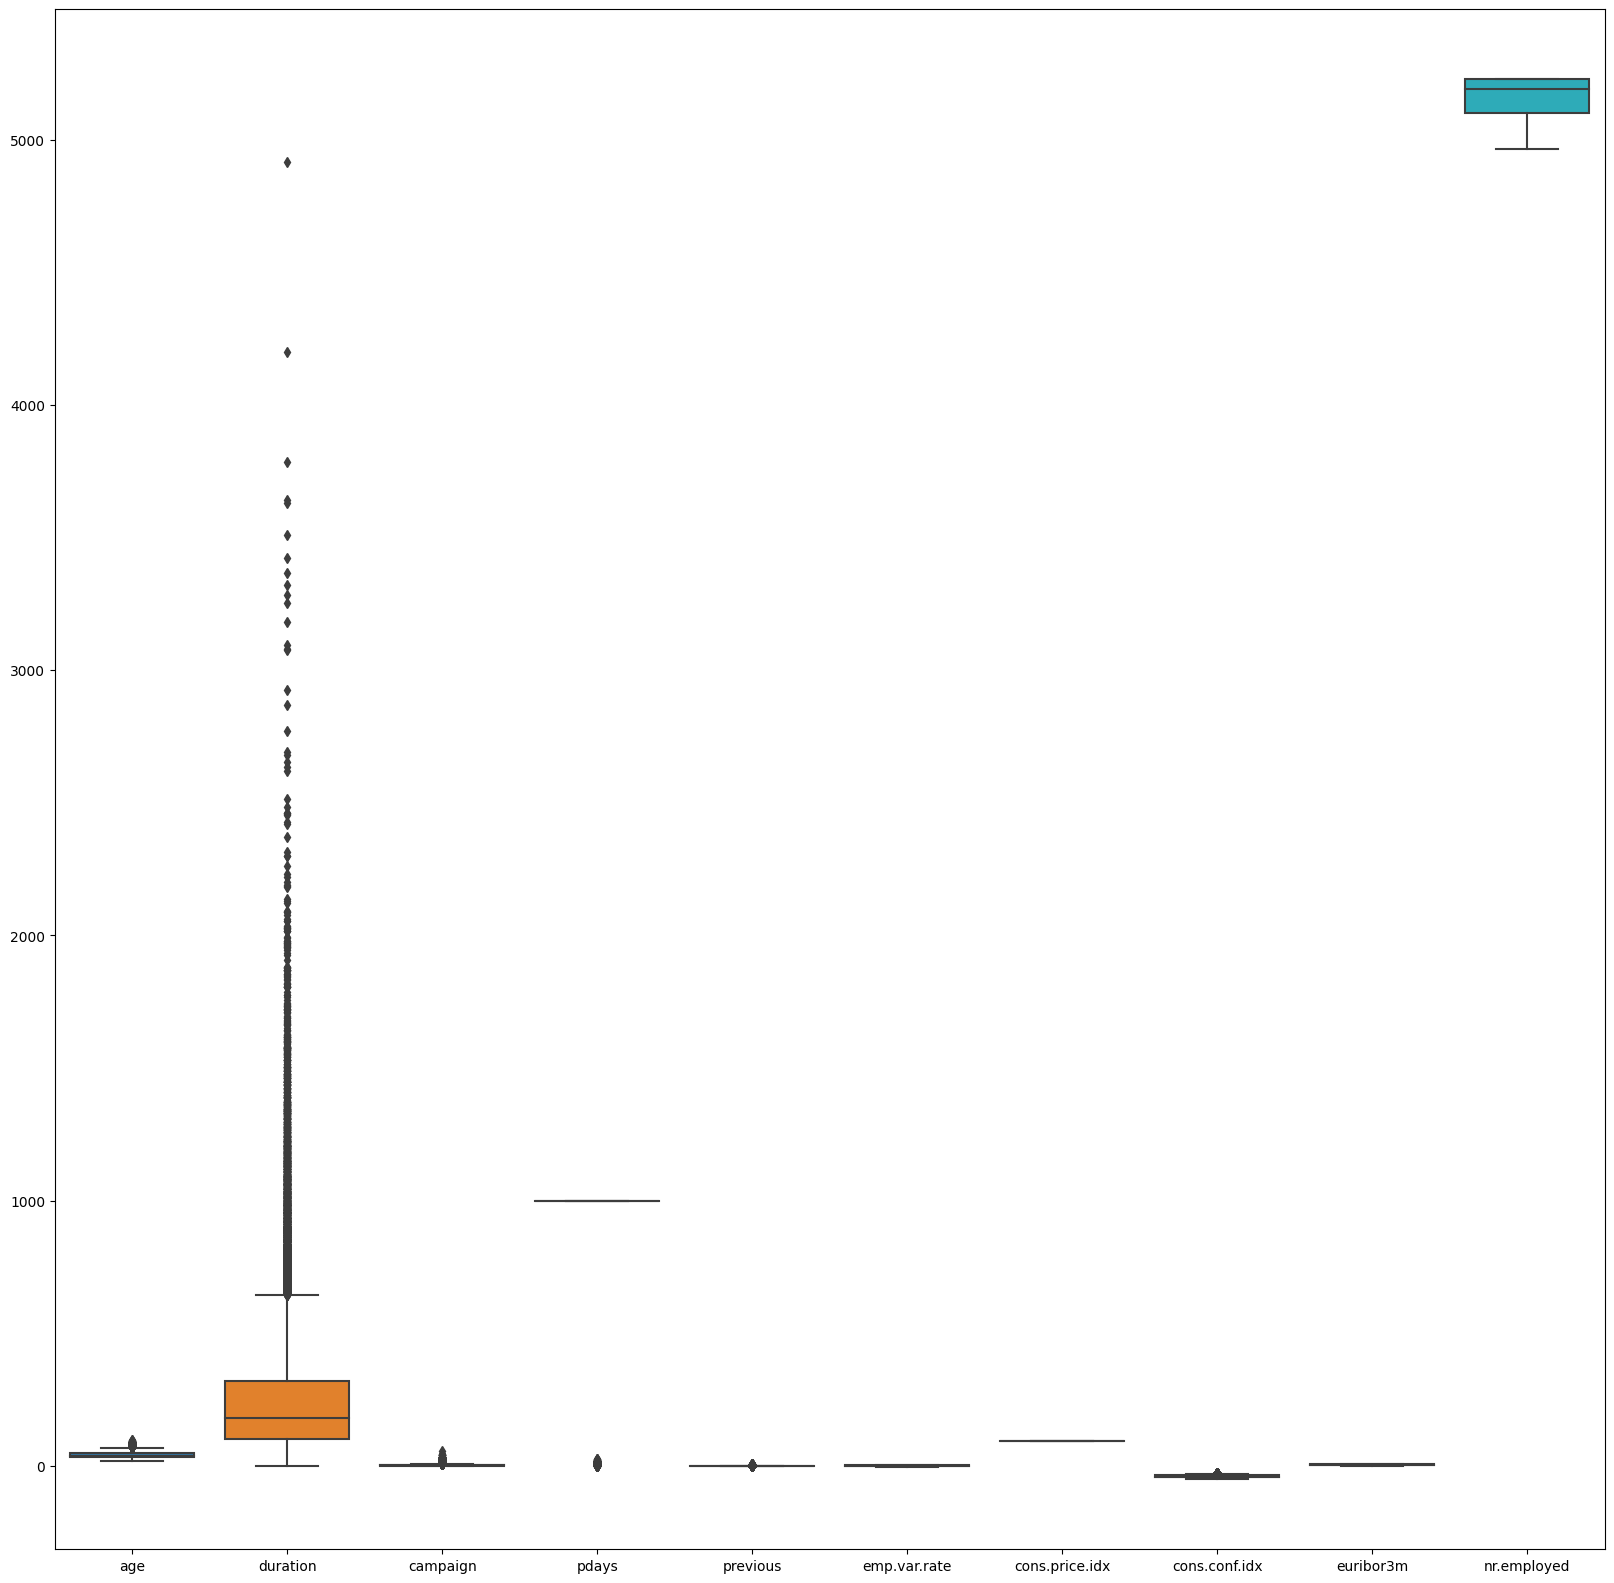

In [38]:
# Creating boxplot of numerical data to find out outliers
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

In [39]:
# Keeping 95th percentile of data to remove the outliers
q = df['duration'].quantile(.95)
df_new = df[df['duration'] < q]


In [40]:
# Shape of new dataset after removing 5th percentile of data
df_new.shape


(39128, 21)

<AxesSubplot:>

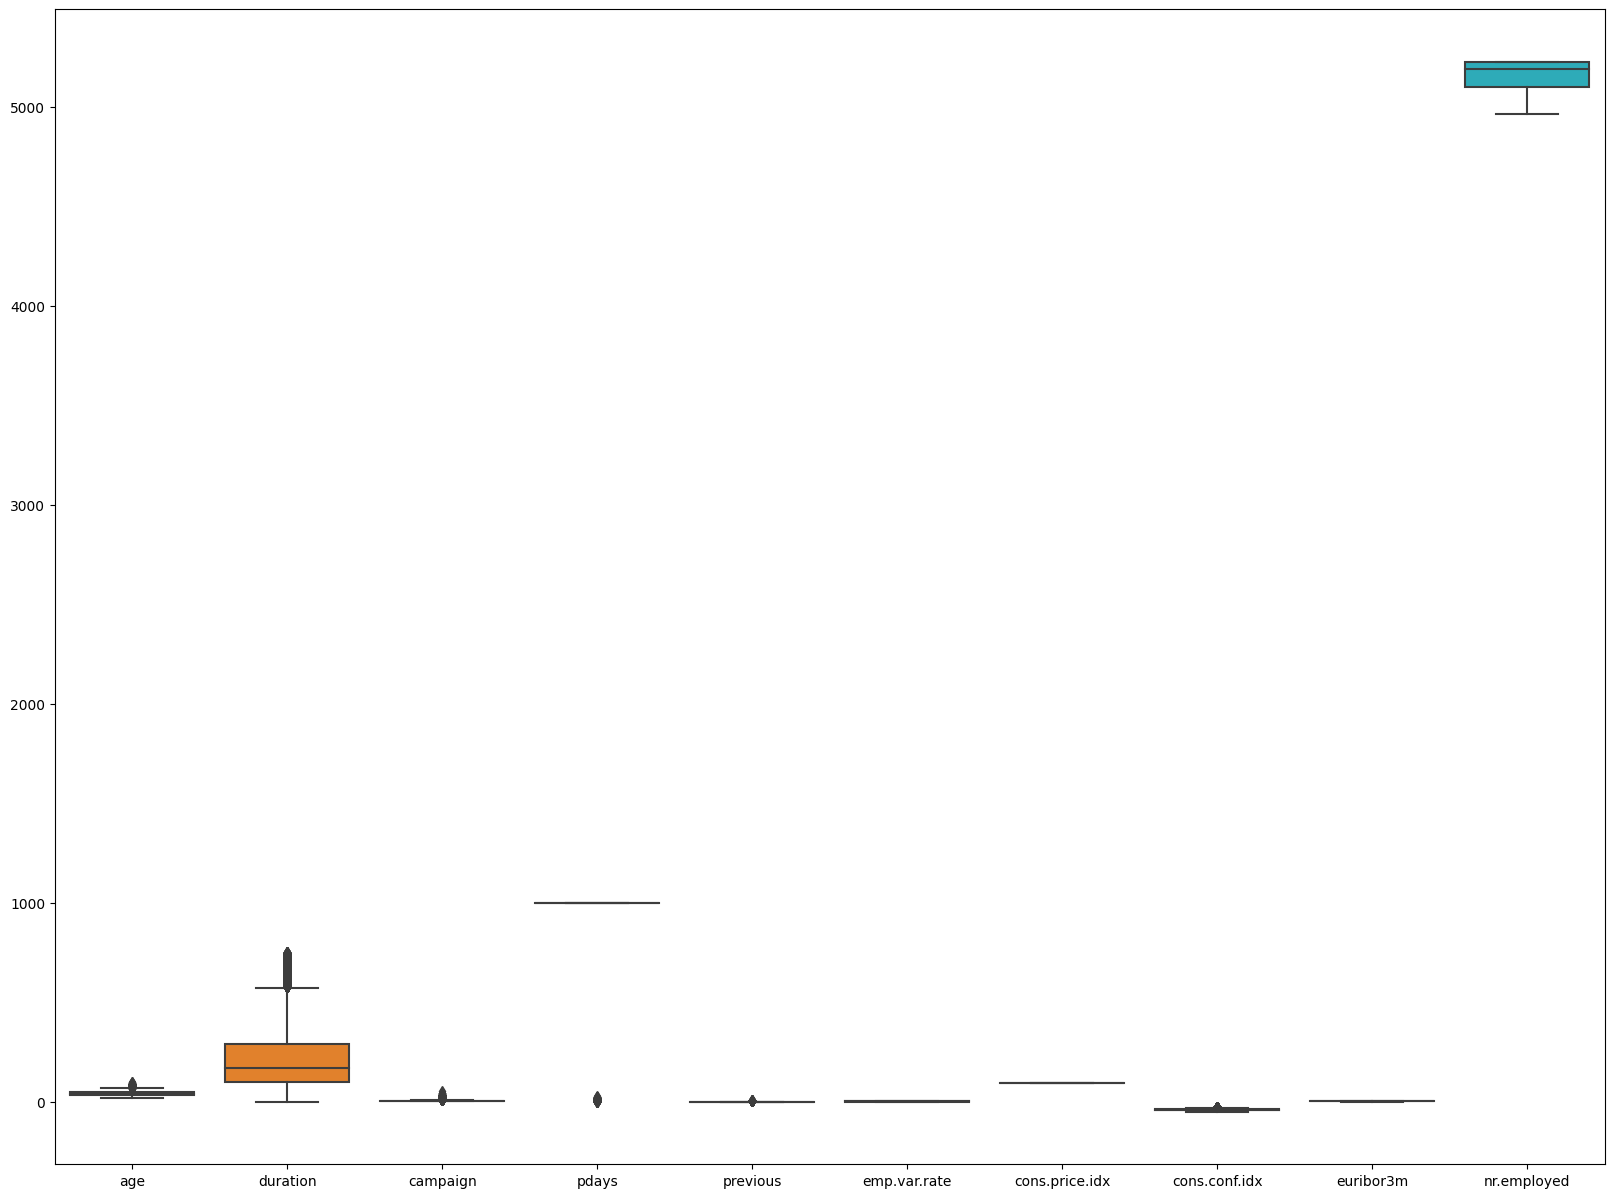

In [41]:
# Boxplot after removing 5th percentile of data
fig, ax = plt.subplots(figsize = (20,15))
sns.boxplot(data = df_new, ax = ax)

# observasion:-

Most of the outliers from duration column are removed after removing 5th percentile of dataset.

# Visualization

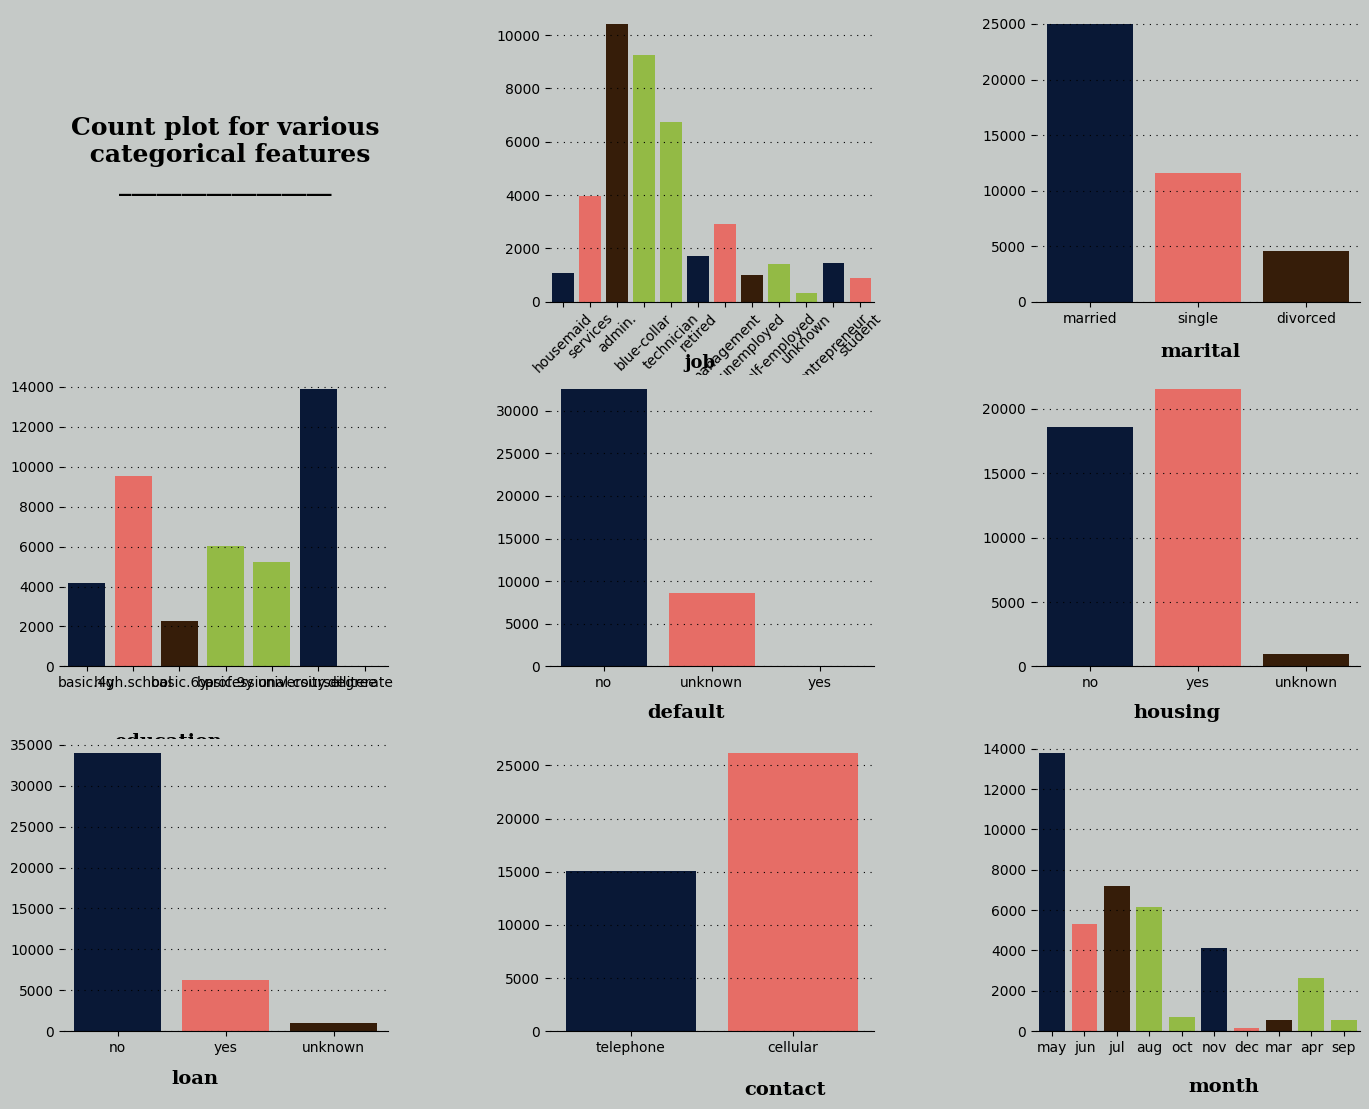

In [42]:
fig = plt.figure(figsize=(23,18))
grid_size = fig.add_gridspec(4,4)
grid_size.update(wspace=0.5, hspace=0.25)  #plotting countplots for checking frequeny w.r.t each categorical features.
ax0 = fig.add_subplot(grid_size[0,0])
ax1 = fig.add_subplot(grid_size[0,1])
ax2 = fig.add_subplot(grid_size[0,2])
ax3 = fig.add_subplot(grid_size[1,0])
ax4 = fig.add_subplot(grid_size[1,1])
ax5 = fig.add_subplot(grid_size[1,2])
ax6 = fig.add_subplot(grid_size[2,0])
ax7 = fig.add_subplot(grid_size[2,1])
ax8 = fig.add_subplot(grid_size[2,2])


background_color = "#C5C9C7"
color_palette = ["#01153E","#FC5A50","#3D1C02","#9ACD32","#9ACD32"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.grid(color='#C5C9C7', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax0.grid(color='#C5C9C7', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Job count
ax1.text(4.50, -2500, 'job', fontsize=13, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
k=sns.countplot(ax=ax1,data=df,x='job',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
k.set_xticklabels(k.get_xticklabels(),rotation=45)
  
# Marital count
ax2.text(0.65, -5000, 'marital', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='marital',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Education
ax3.text(0.60,-4000,'education', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='education',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Default
ax4.text(.4, -6000, 'default', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='default',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Housing
ax5.text(0.4, -4000, 'housing', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='housing',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Loan
ax6.text(0.50, -6500, 'loan', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='loan',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Contact
ax7.text(0.70, -6000, 'contact', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='contact',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Month
ax8.text(4.2,-3000,'month',fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='month',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

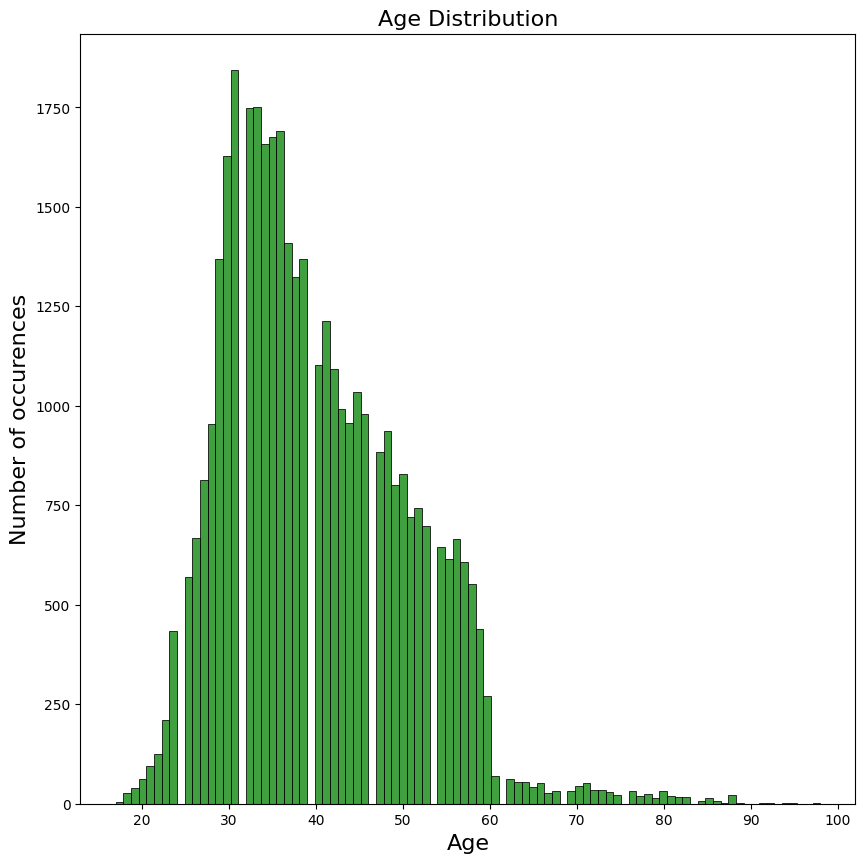

In [43]:
# Bar graph to represent the age distribution
plt.figure(figsize = (10,10))
plt.title("Age Distribution", fontsize = 16)
plt.xlabel('Age', fontsize = 16)
plt.ylabel("Number of occurences", fontsize = 16)
sns.histplot(df_new["age"], color = "green")
plt.show()

y
no     AxesSubplot(0.125,0.11;0.775x0.77)
yes    AxesSubplot(0.125,0.11;0.775x0.77)
Name: age, dtype: object

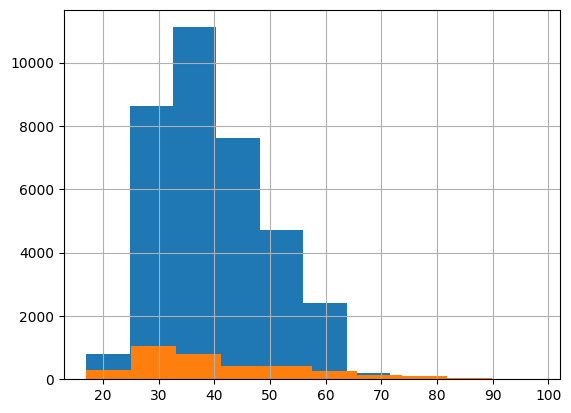

In [44]:
# Age comparison with respect to subscription
df_new.groupby('y').age.hist()

In [45]:
# Histogram to represent the distribution of data in each categorical column
def plot_hist(df_new, feature):
    plt.hist(df_new[feature], bins = 50)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('{} distribution with hist'.format(feature))
    plt.show()


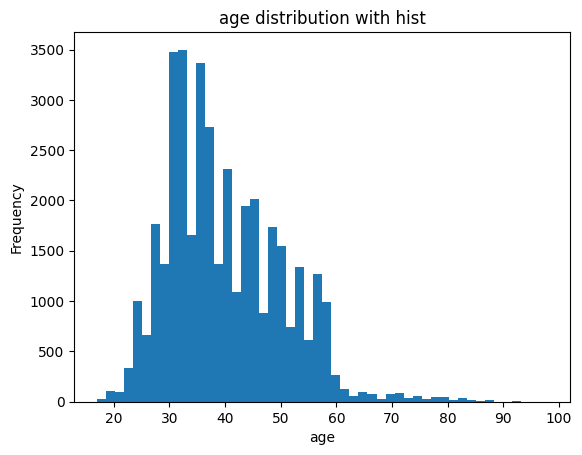

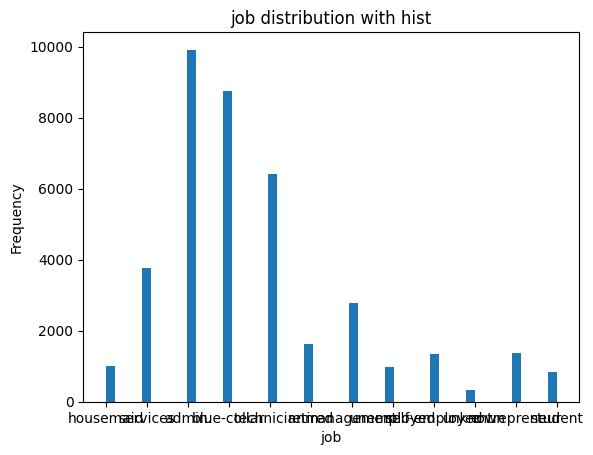

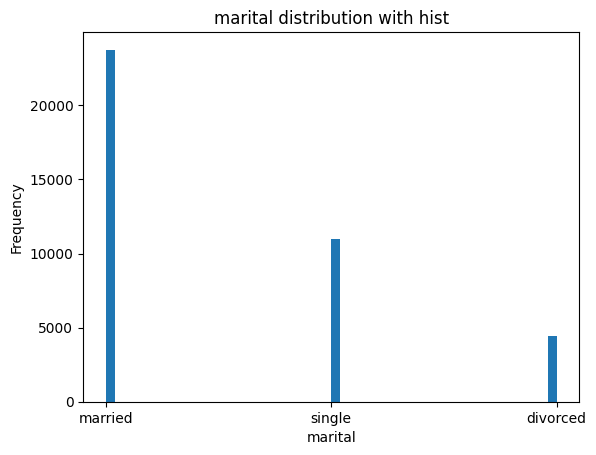

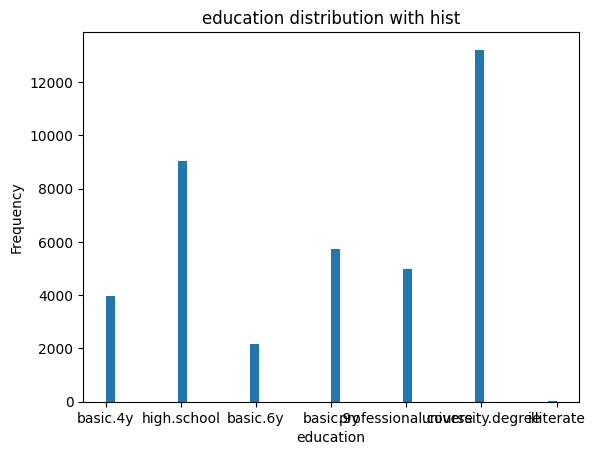

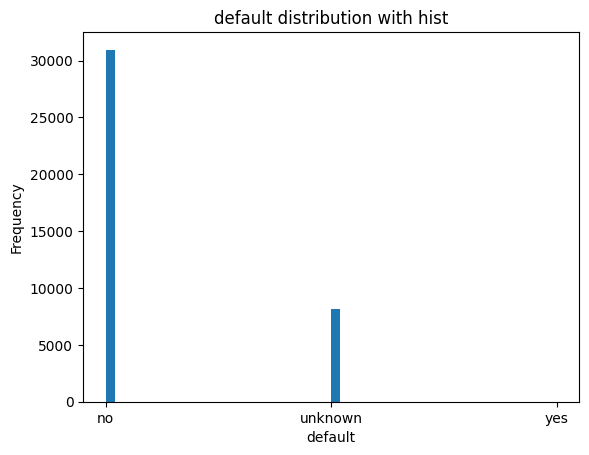

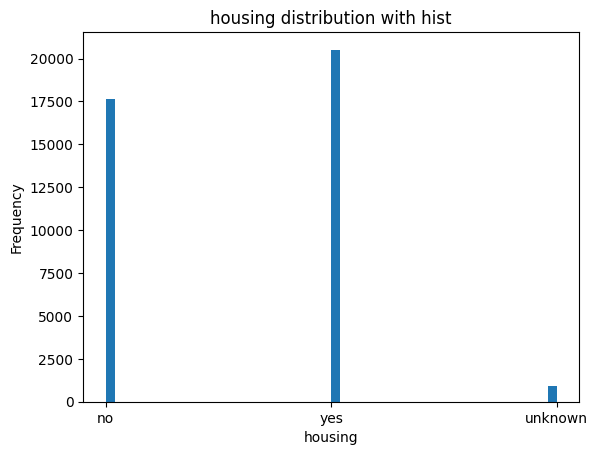

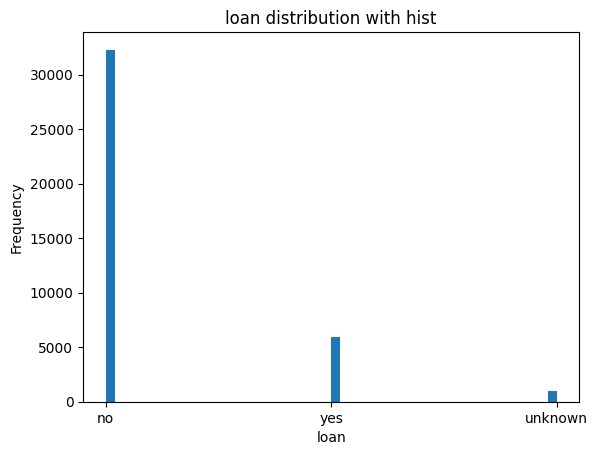

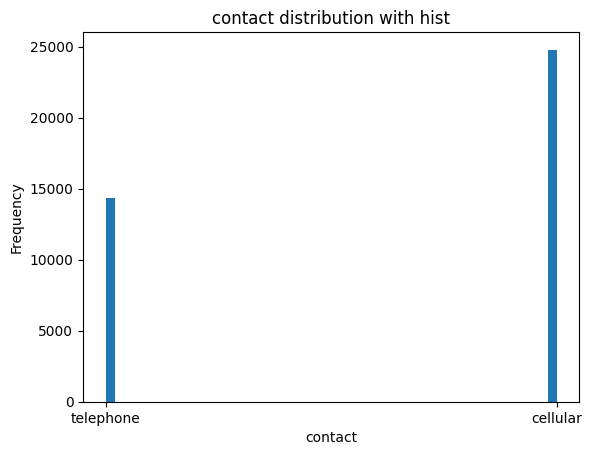

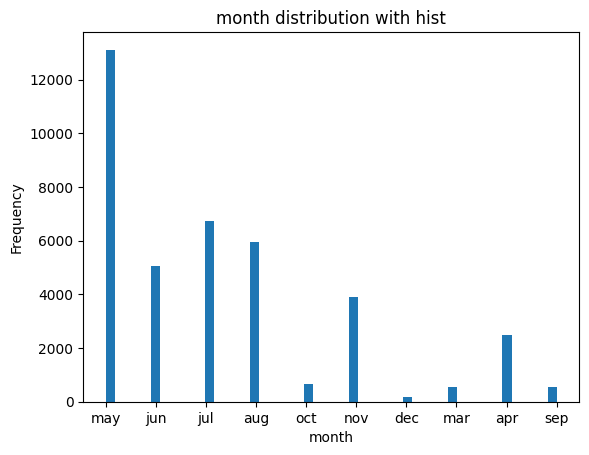

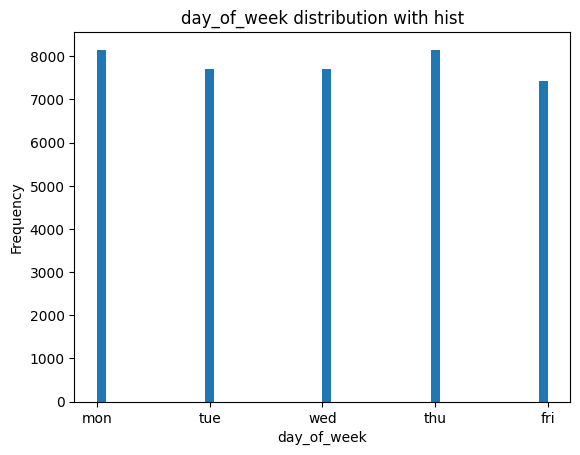

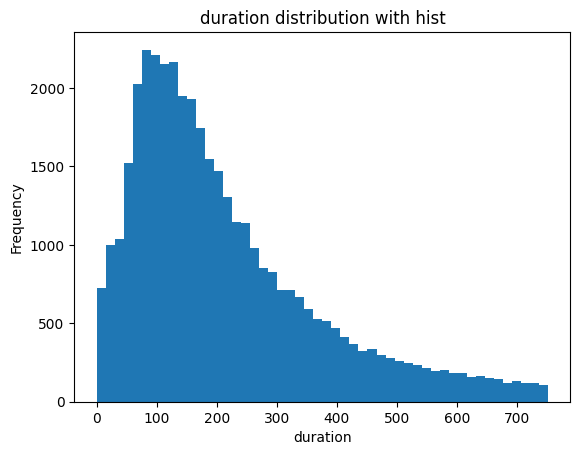

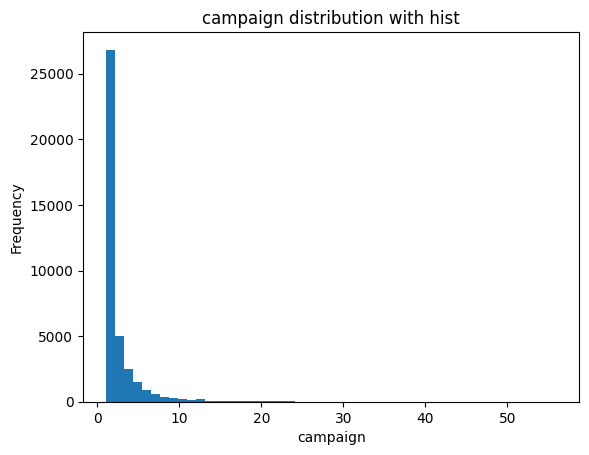

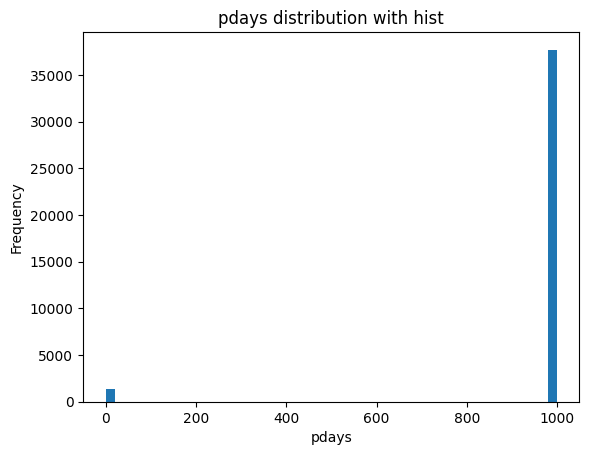

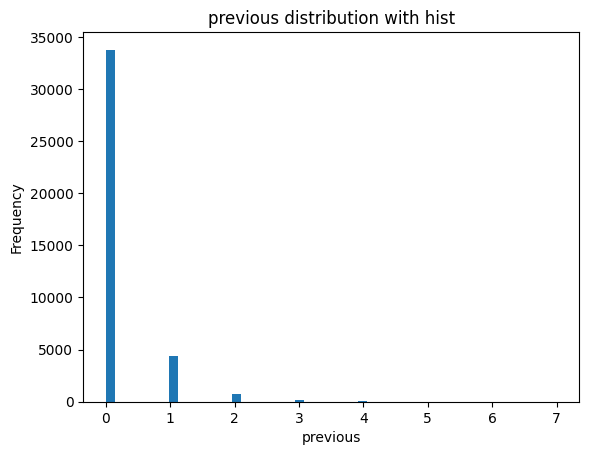

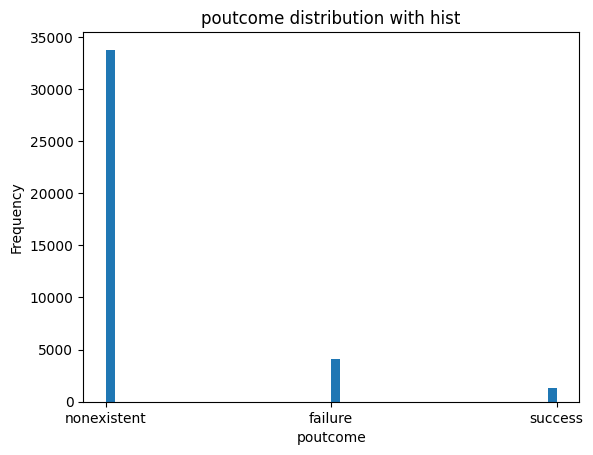

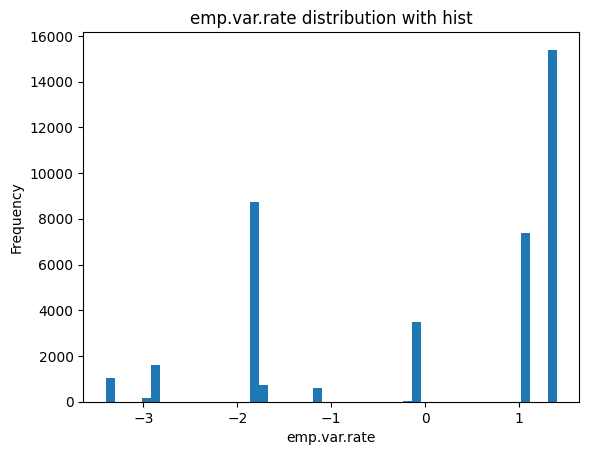

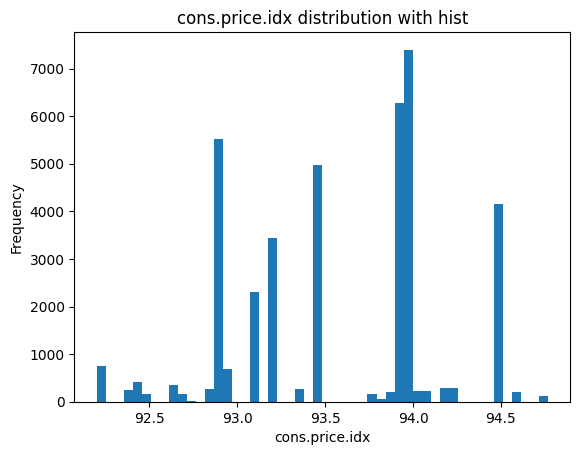

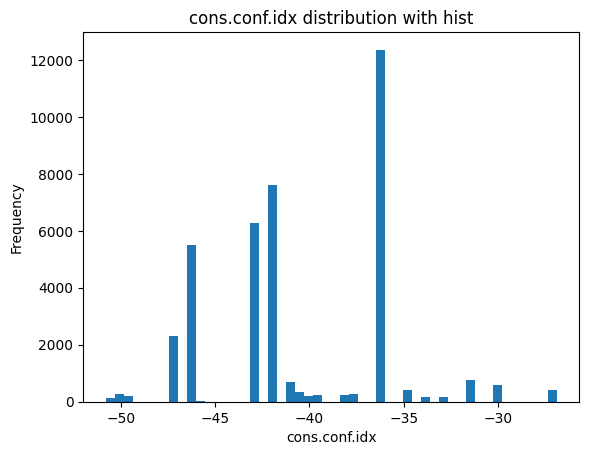

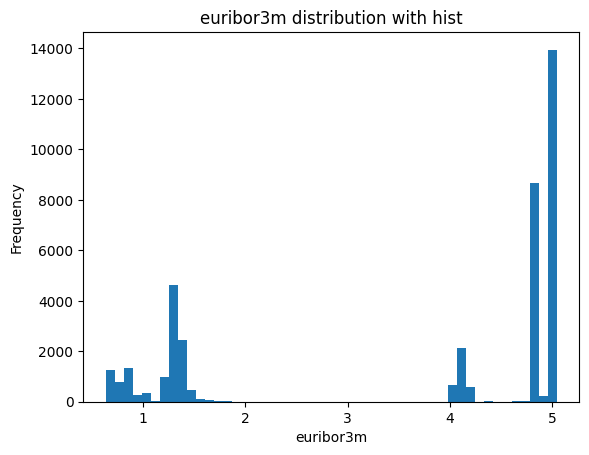

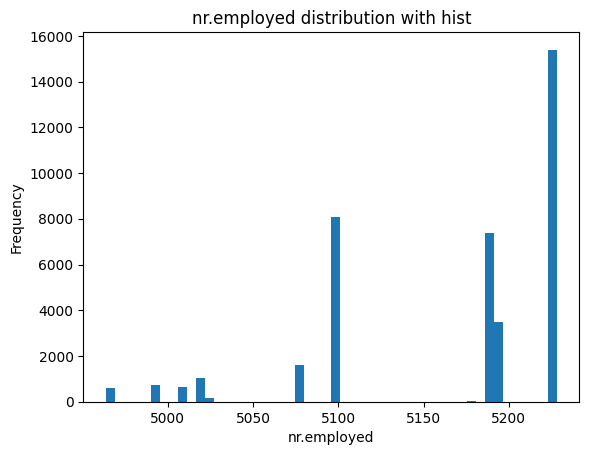

In [46]:
for n in df_new.columns[:-1]:
    plot_hist(df_new,n)


In [47]:
# Percentage of value count of unique values of job column
df_new['job'].value_counts()/len(df_new)*100


admin.           25.337354
blue-collar      22.367614
technician       16.417910
services          9.647823
management        7.107442
retired           4.168370
entrepreneur      3.516663
self-employed     3.416990
housemaid         2.596606
unemployed        2.486710
student           2.113576
unknown           0.822940
Name: job, dtype: float64

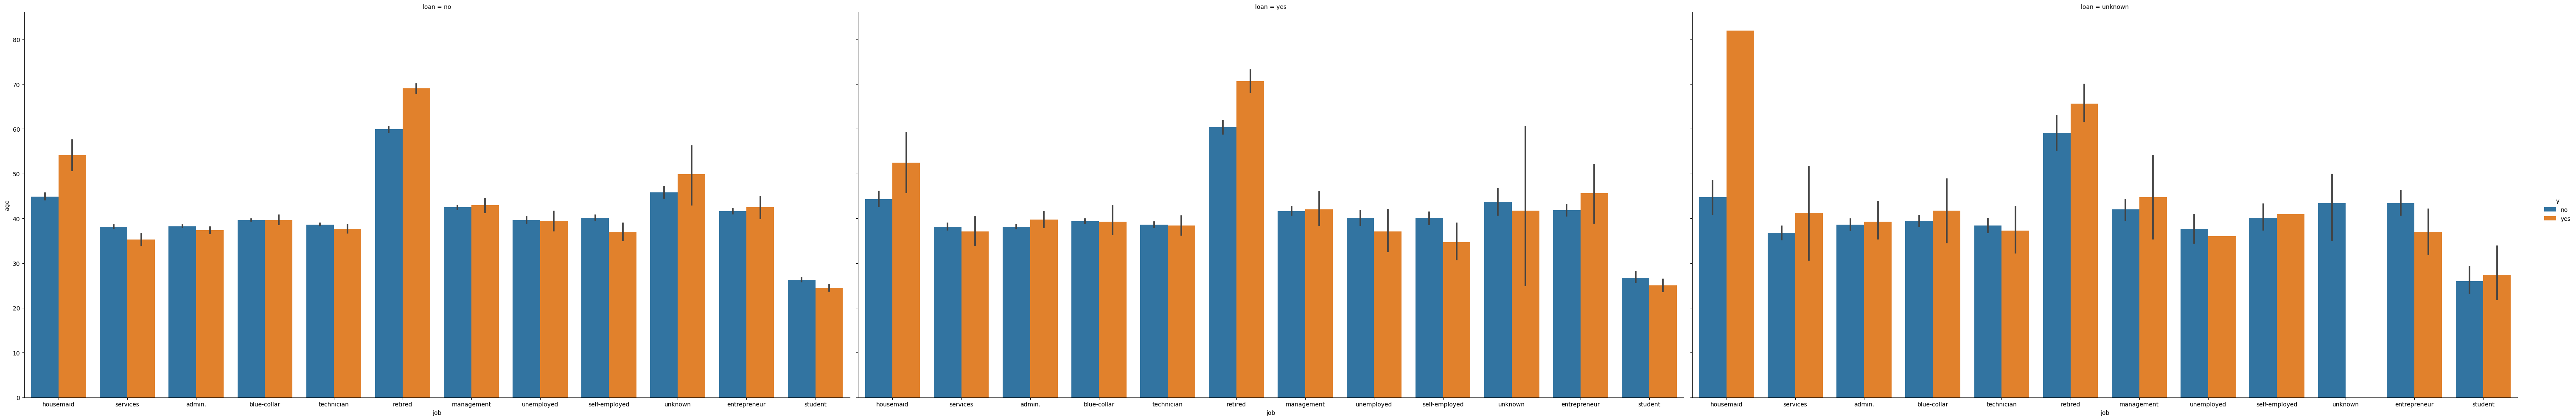

In [48]:
# Relationship between job, age and loan
sns.catplot(x='job', y = 'age', data = df_new, hue = 'y',
               kind = 'bar', col = 'loan', height = 10, aspect = 2)



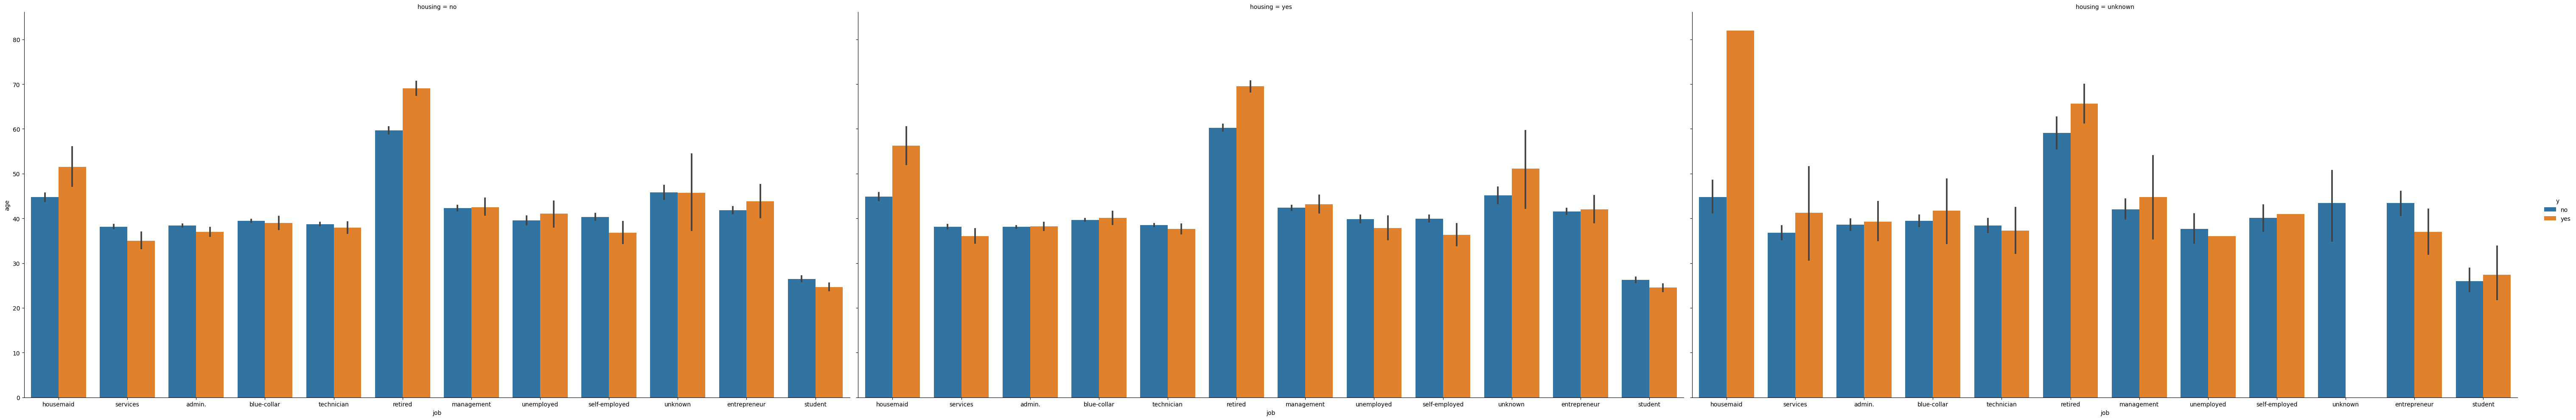

In [49]:
# Relationship between job, age and housing
sns.catplot(x='job', y = 'age', data = df_new, hue = 'y',
               col = 'housing', kind = 'bar', height = 10, aspect = 2)

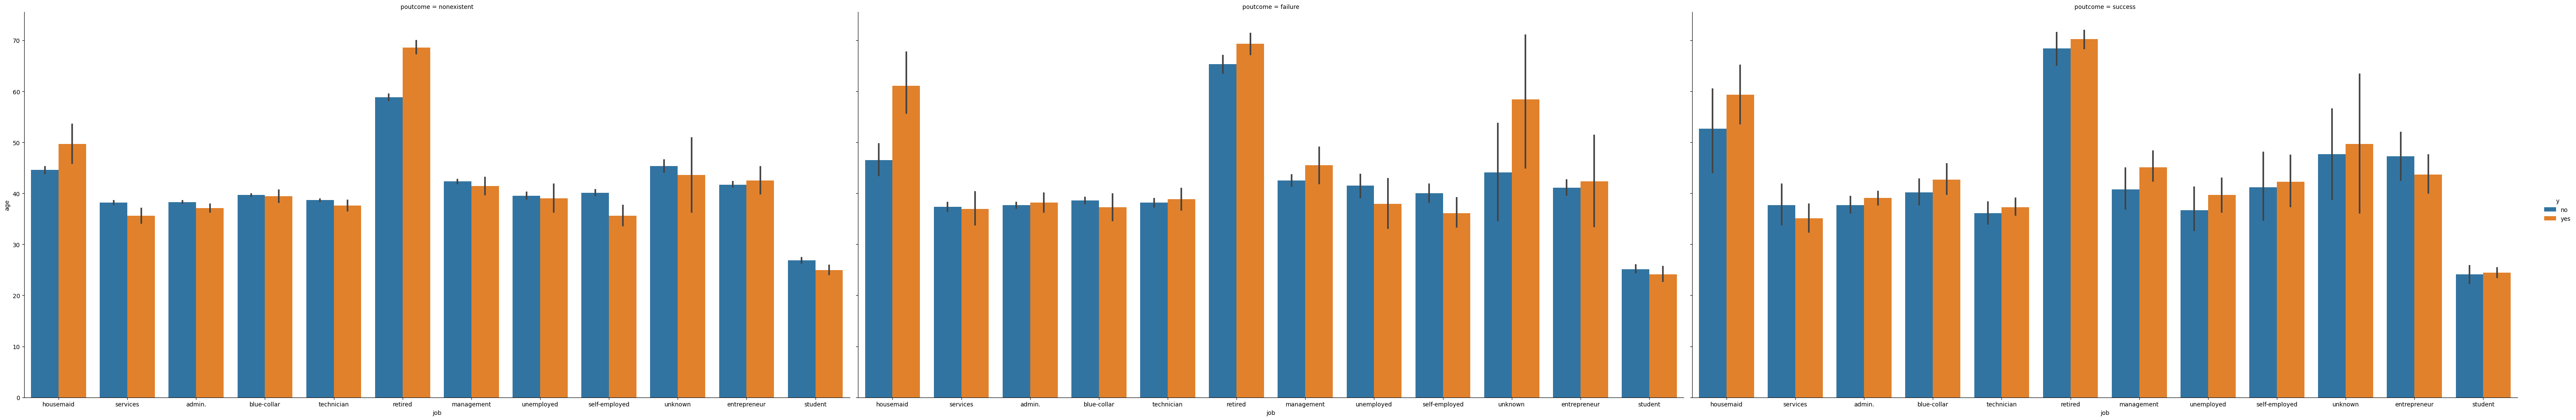

In [50]:
# Relationship between job, age and poutcome
sns.catplot(x='job', y = 'age', data = df_new, hue = 'y',
                col = 'poutcome', kind = 'bar', height = 10, aspect = 2)



In [51]:
# Percentage of value count of unique values of marital column
df_new['marital'].value_counts()/len(df_new)*100


married     60.721223
single      28.023410
divorced    11.255367
Name: marital, dtype: float64

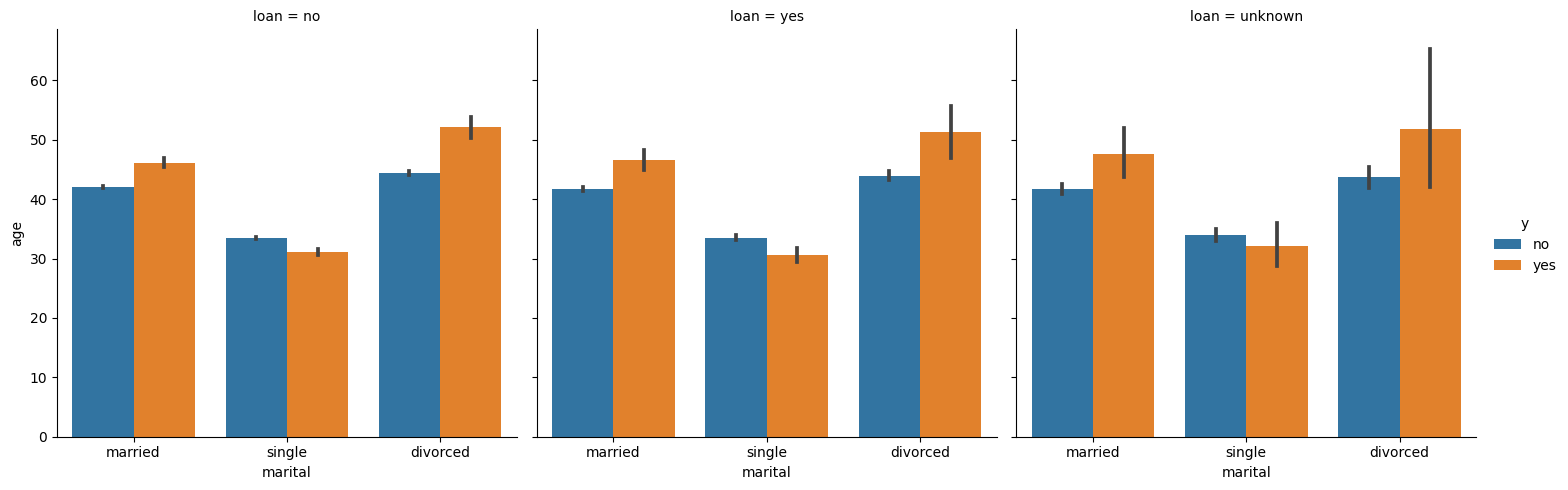

In [52]:
# Relationship between marital, age and loan
sns.catplot(x = 'marital', y = 'age', data = df_new,
            hue = 'y', col = 'loan', kind = 'bar')


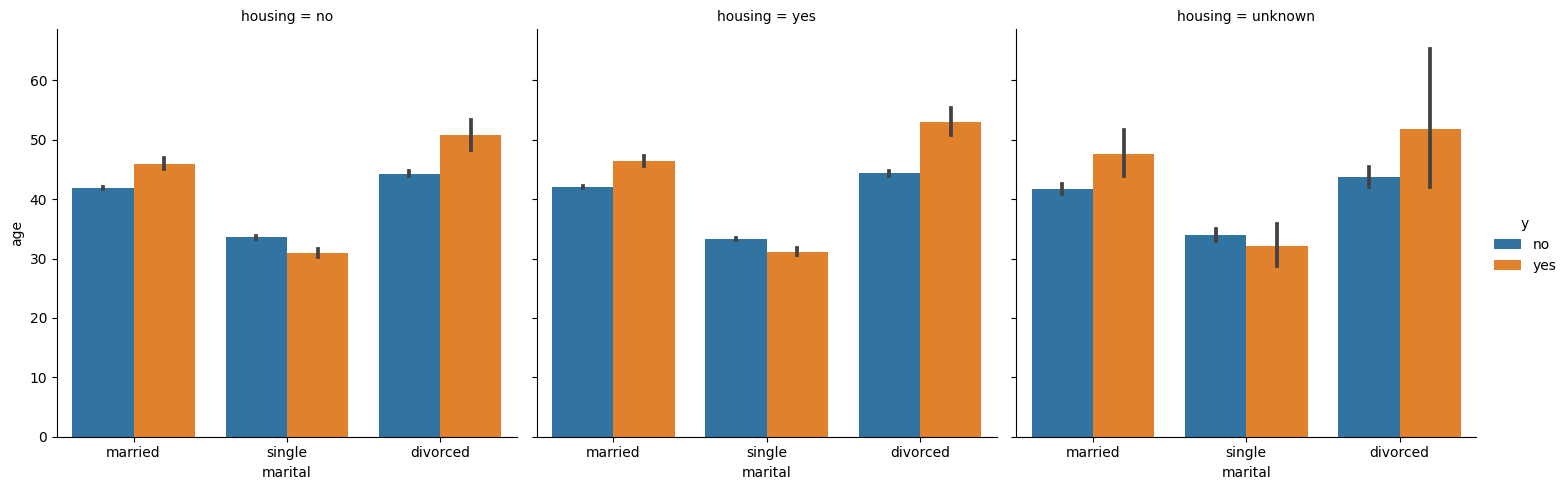

In [53]:
# Relationship between marital, age and housing
sns.catplot(x = 'marital', y = 'age', data = df_new,
            hue = 'y', col = 'housing', kind = 'bar')


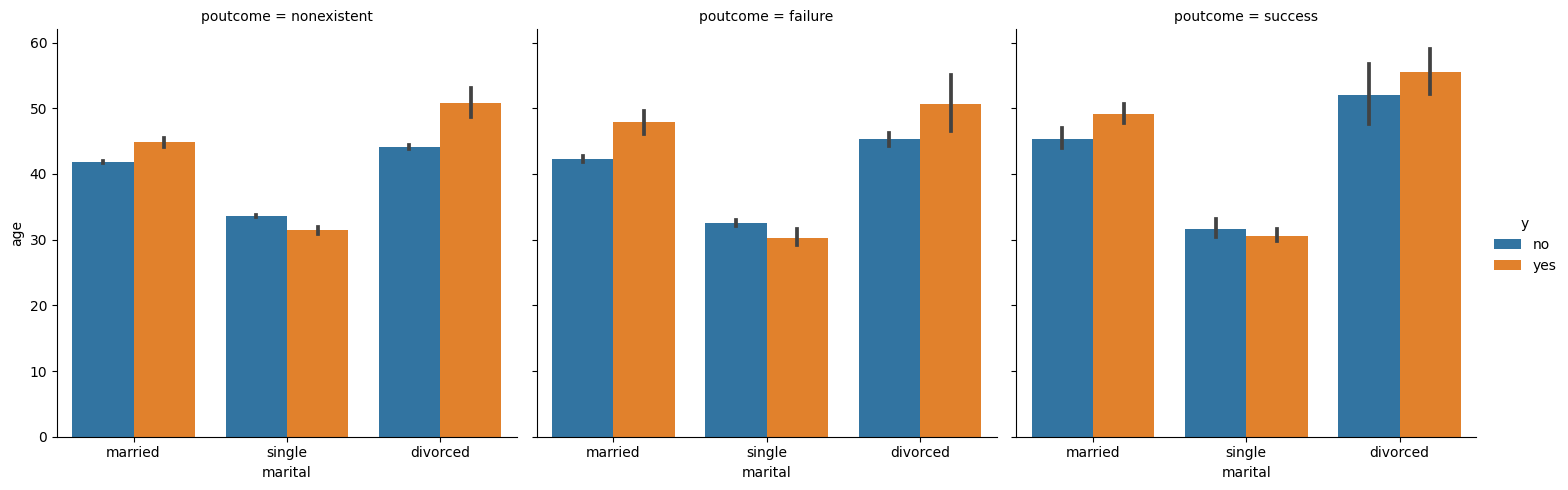

In [54]:
# Relationship between marital, age and poutcome
sns.catplot(x = 'marital', y = 'age', data = df_new,
           hue = 'y', col = 'poutcome', kind = 'bar')



In [55]:
# Percentage of value count of unique values of education column
df_new['education'].value_counts()/len(df_new)*100


university.degree      33.783991
high.school            23.078103
basic.9y               14.641689
professional.course    12.786240
basic.4y               10.148743
basic.6y                5.520343
illiterate              0.040891
Name: education, dtype: float64

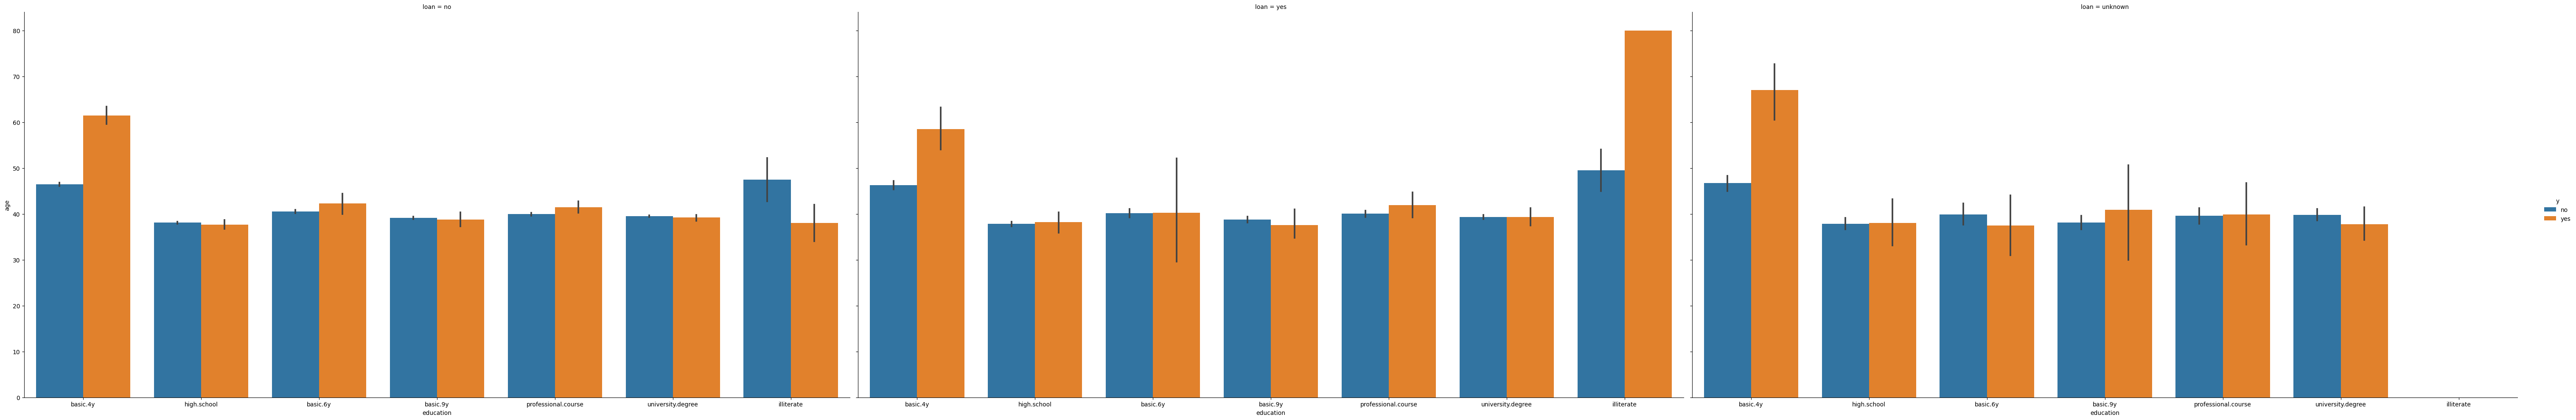

In [56]:
# Relationship between education, age and loan
sns.catplot(x = 'education', y = 'age', data = df_new,
           hue = 'y', col = 'loan', kind = 'bar', height = 10, aspect = 2)


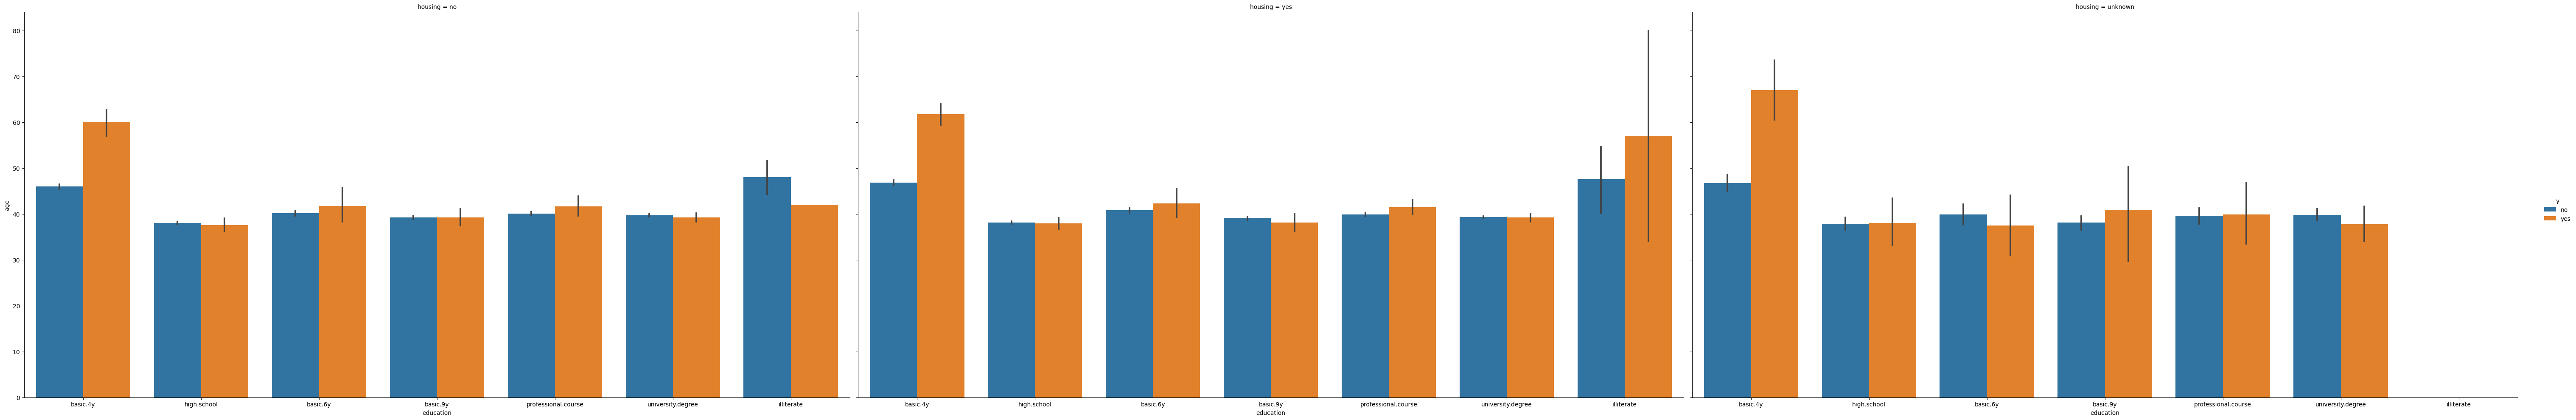

In [57]:
# Relationship between education, age and housing
sns.catplot(x = 'education', y = 'age', data = df_new, hue = 'y',
           col = 'housing', kind = 'bar', height = 10, aspect = 2)



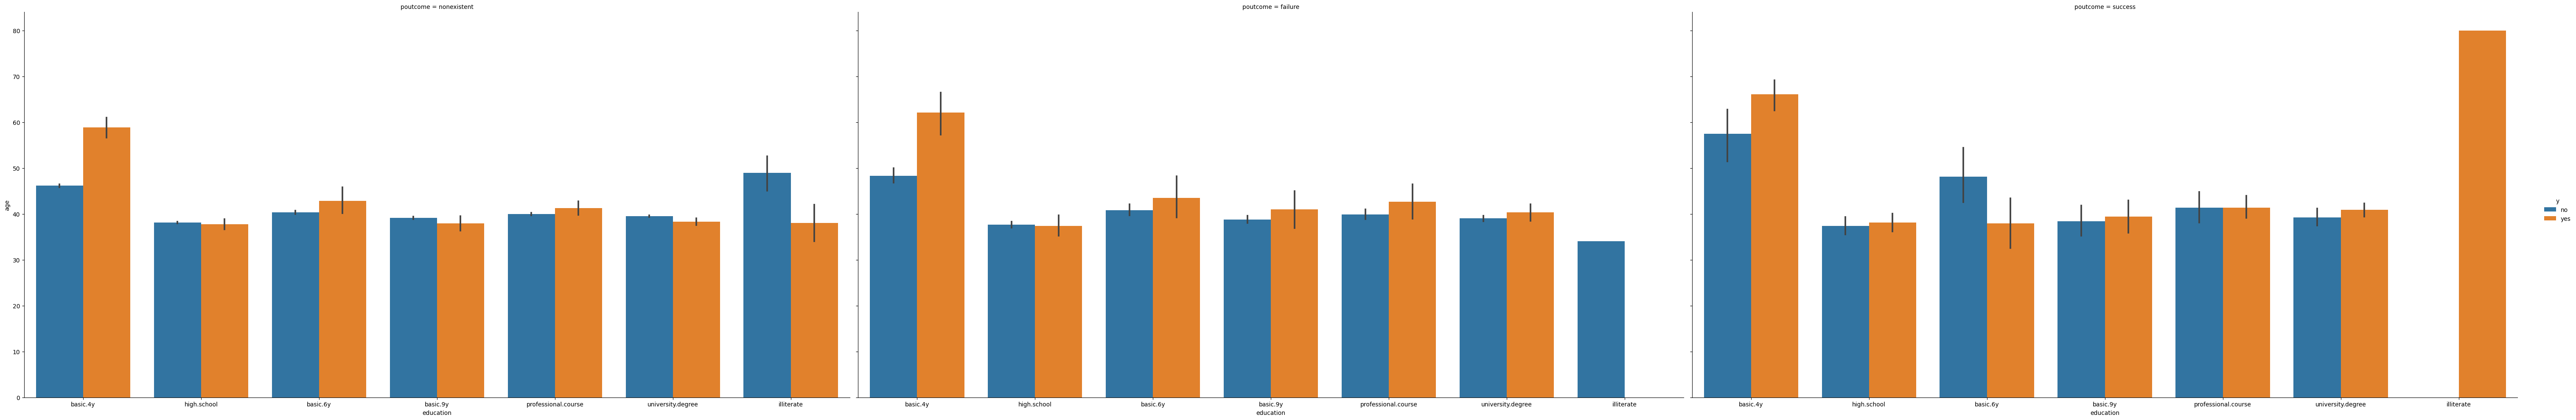

In [58]:
# Relationship between education, age and poutcome
sns.catplot(x = 'education', y = 'age', data = df_new, hue = 'y',
           col = 'poutcome', kind = 'bar', height = 10, aspect = 2)


     

In [59]:
# Value count of loan
df_new['loan'].value_counts()


no         32272
yes         5915
unknown      941
Name: loan, dtype: int64

In [60]:
# Value count of month
df_new['month'].value_counts()

may    13112
jul     6724
aug     5932
jun     5074
nov     3903
apr     2469
oct      678
sep      535
mar      533
dec      168
Name: month, dtype: int64

# Countplot of month

<AxesSubplot:xlabel='month', ylabel='count'>

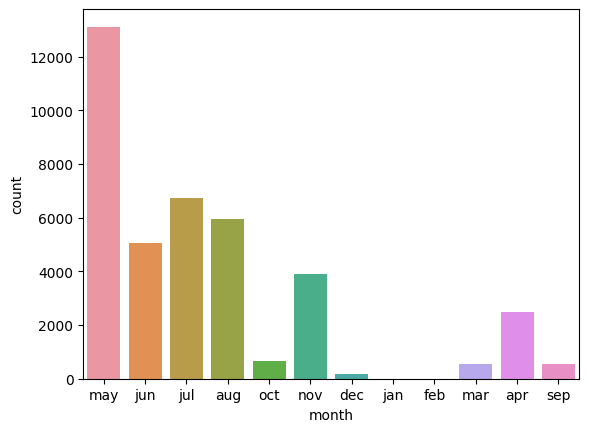

In [61]:
labels = ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb','mar', 'apr', 'sep']
sns.countplot(x = 'month', data = df_new, order = labels)


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

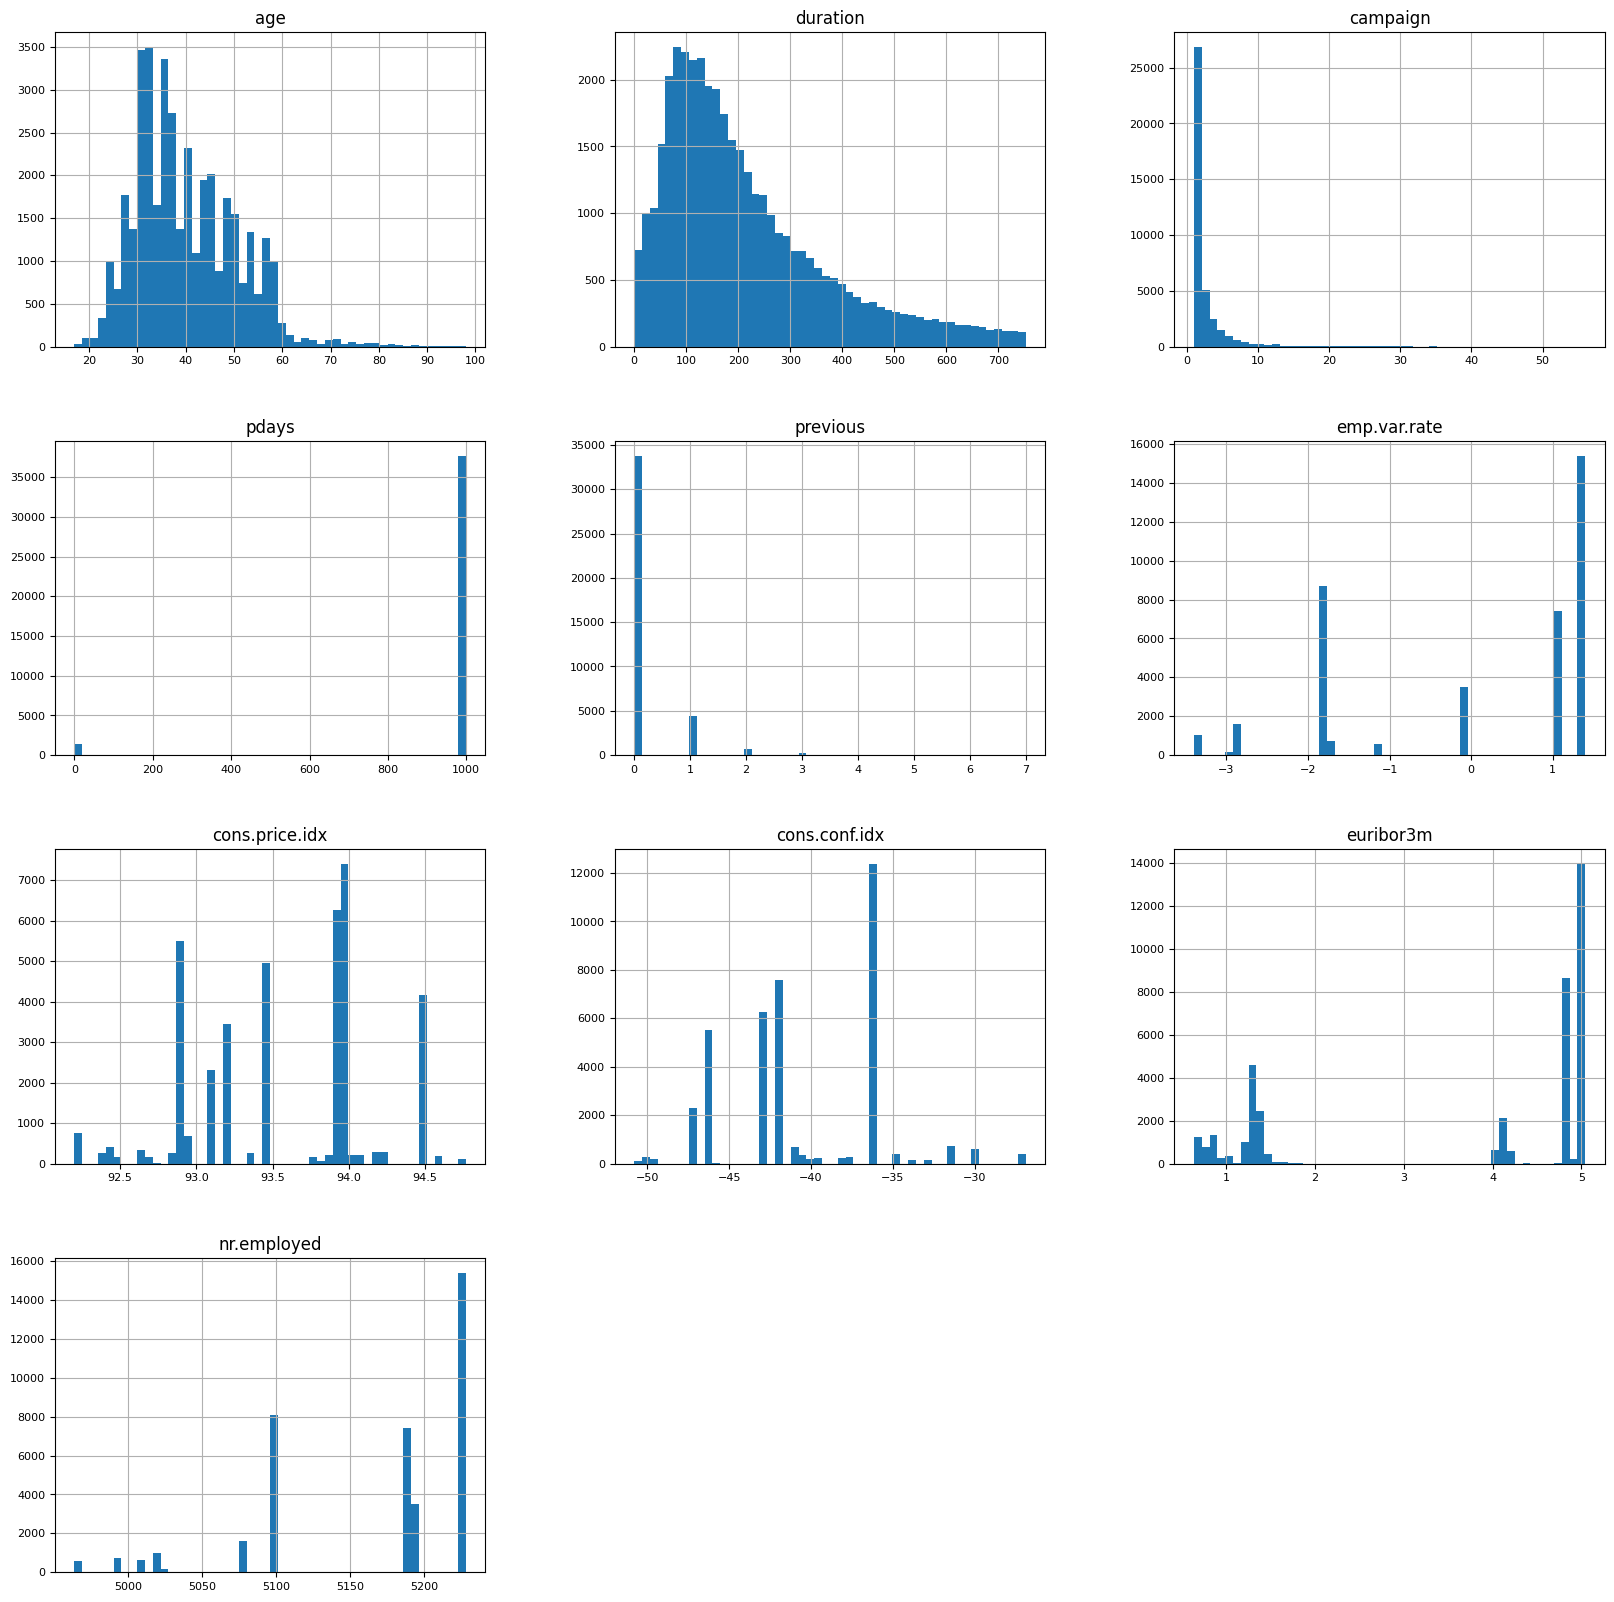

In [62]:
# Distribution of categorical columns
df_new.hist(figsize = (20, 20), bins = 50, xlabelsize=8, ylabelsize=8)


# Pairplot

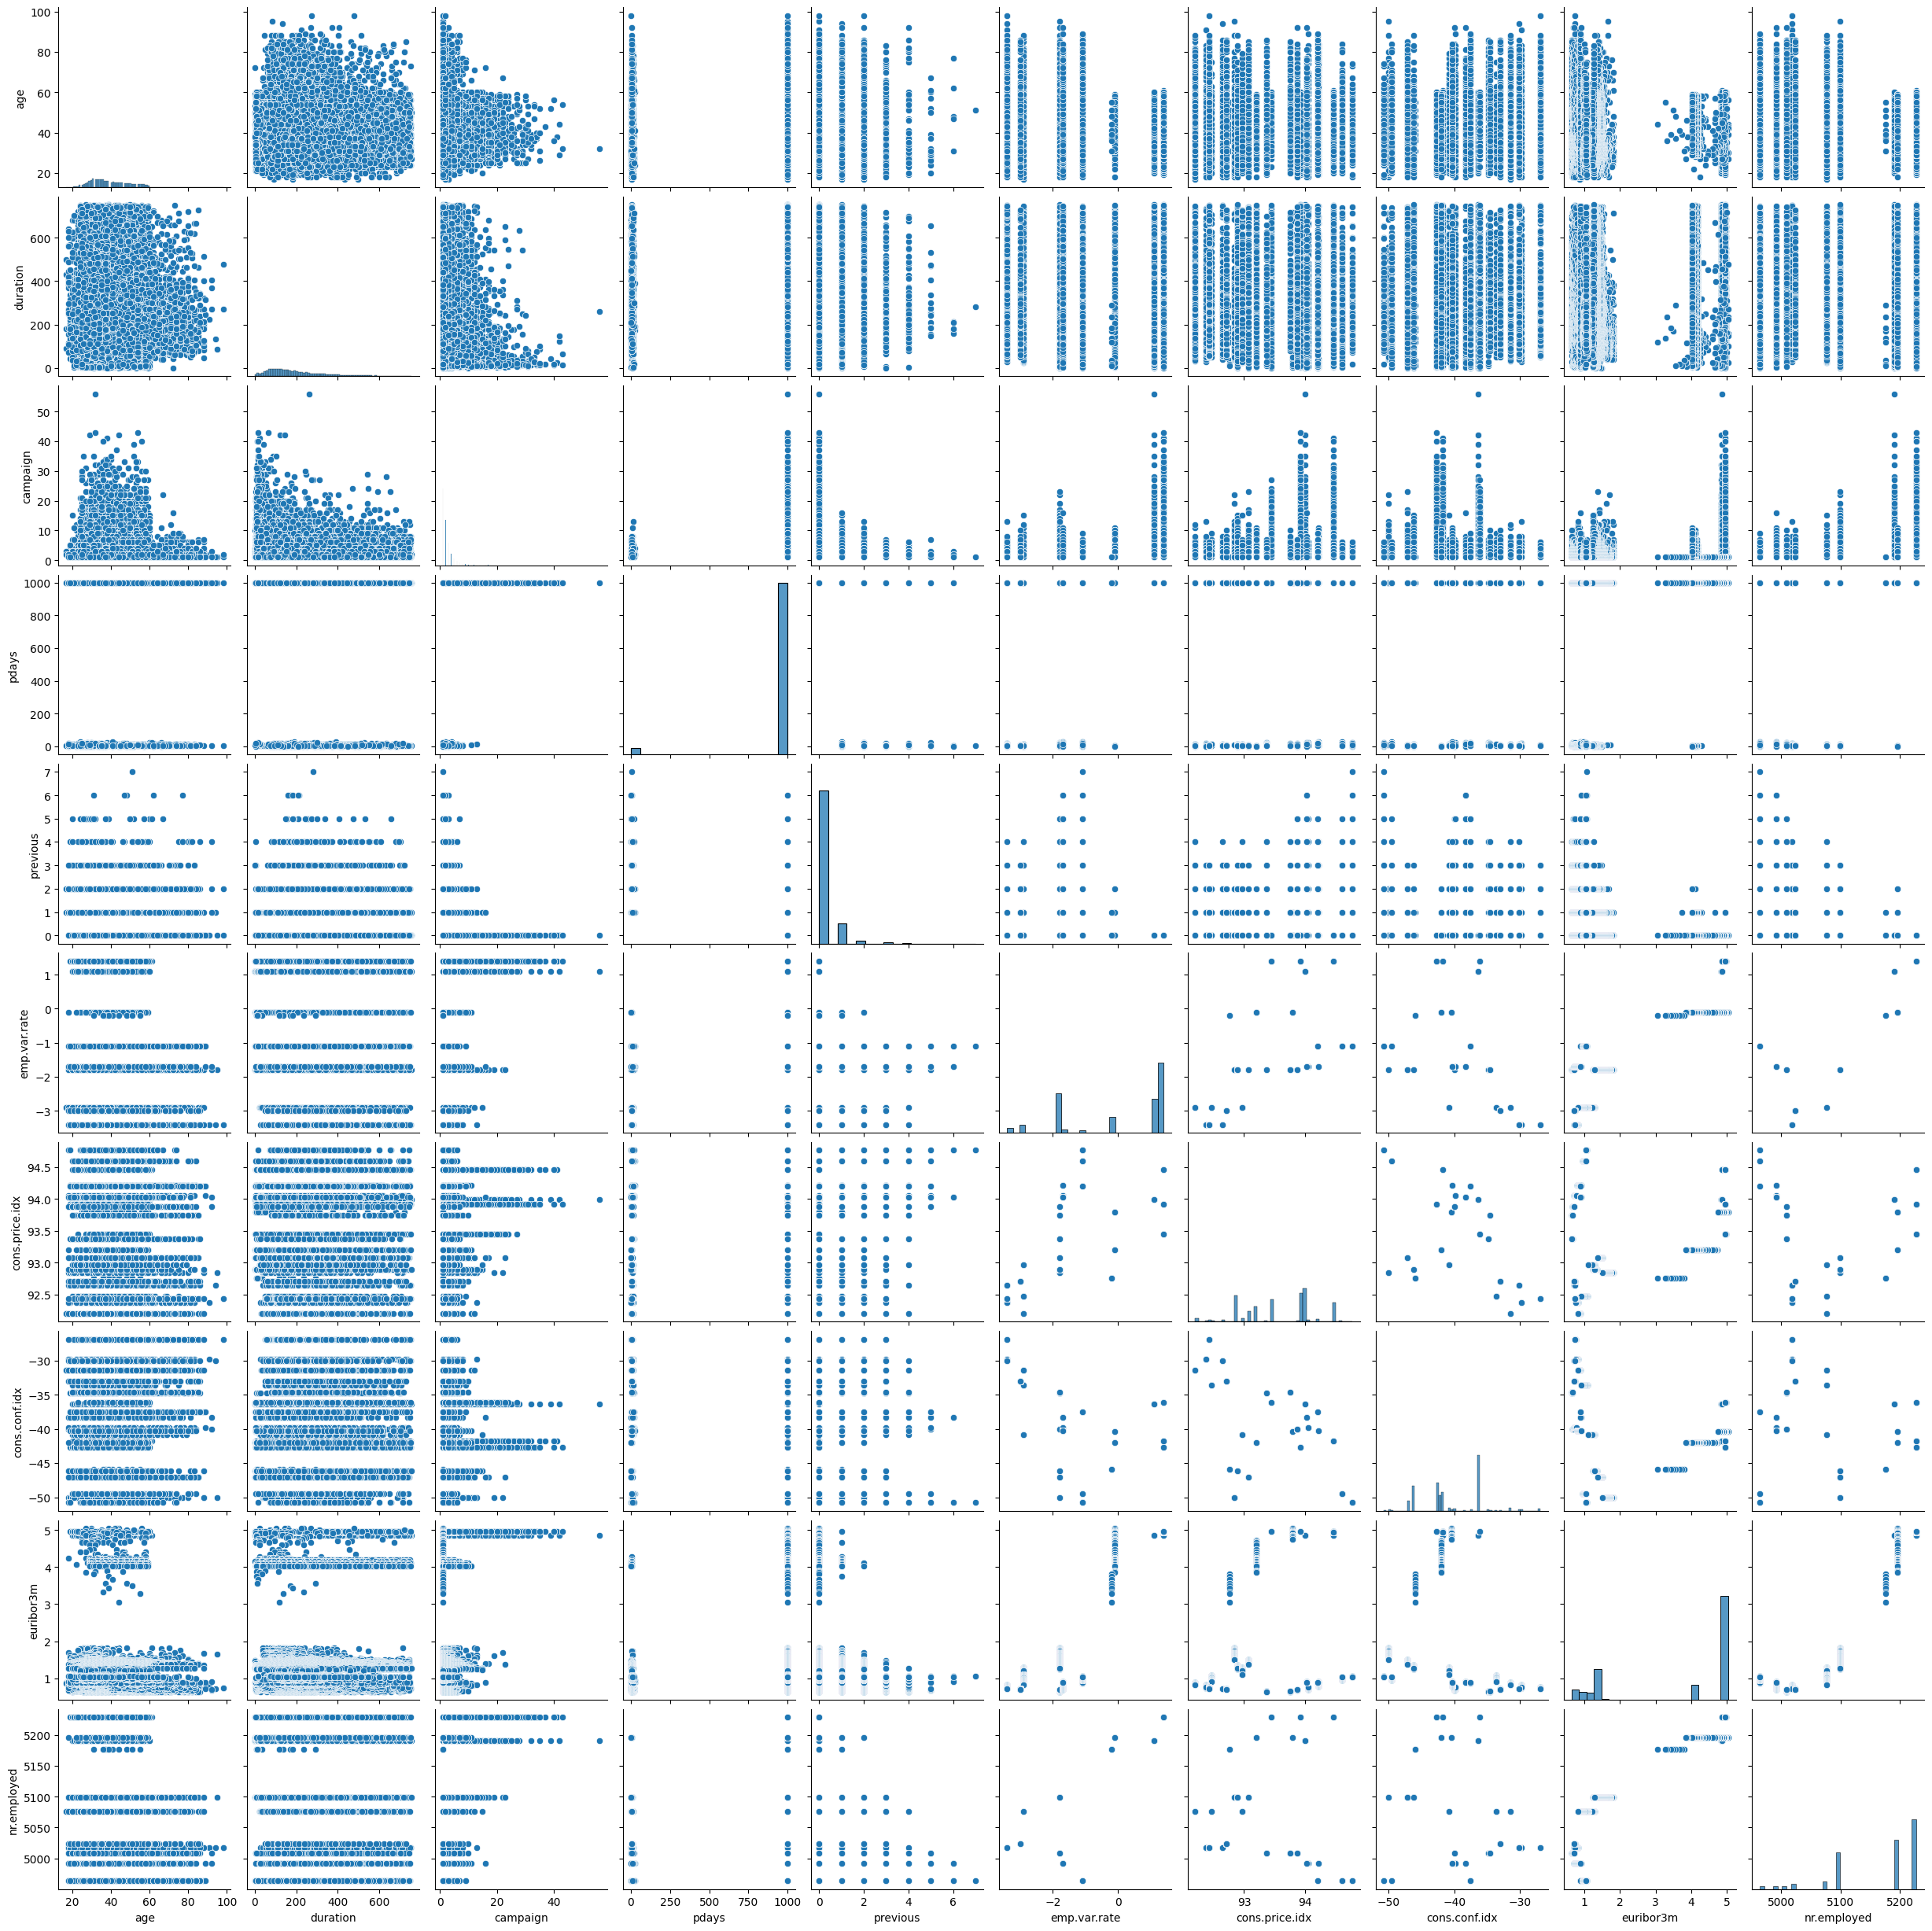

In [63]:
sns.pairplot(df_new)

# Correlation Analysis

Range: [-1, 1]
    
No correlation r=0

Very weak correlation: r<20
    
Weak correlation: between 0.20-0.49
    
Moderate correlation: between 0.5-0.79
    
Strong correlation: between 0.8-0.99
    
Perfect correlation: r=1

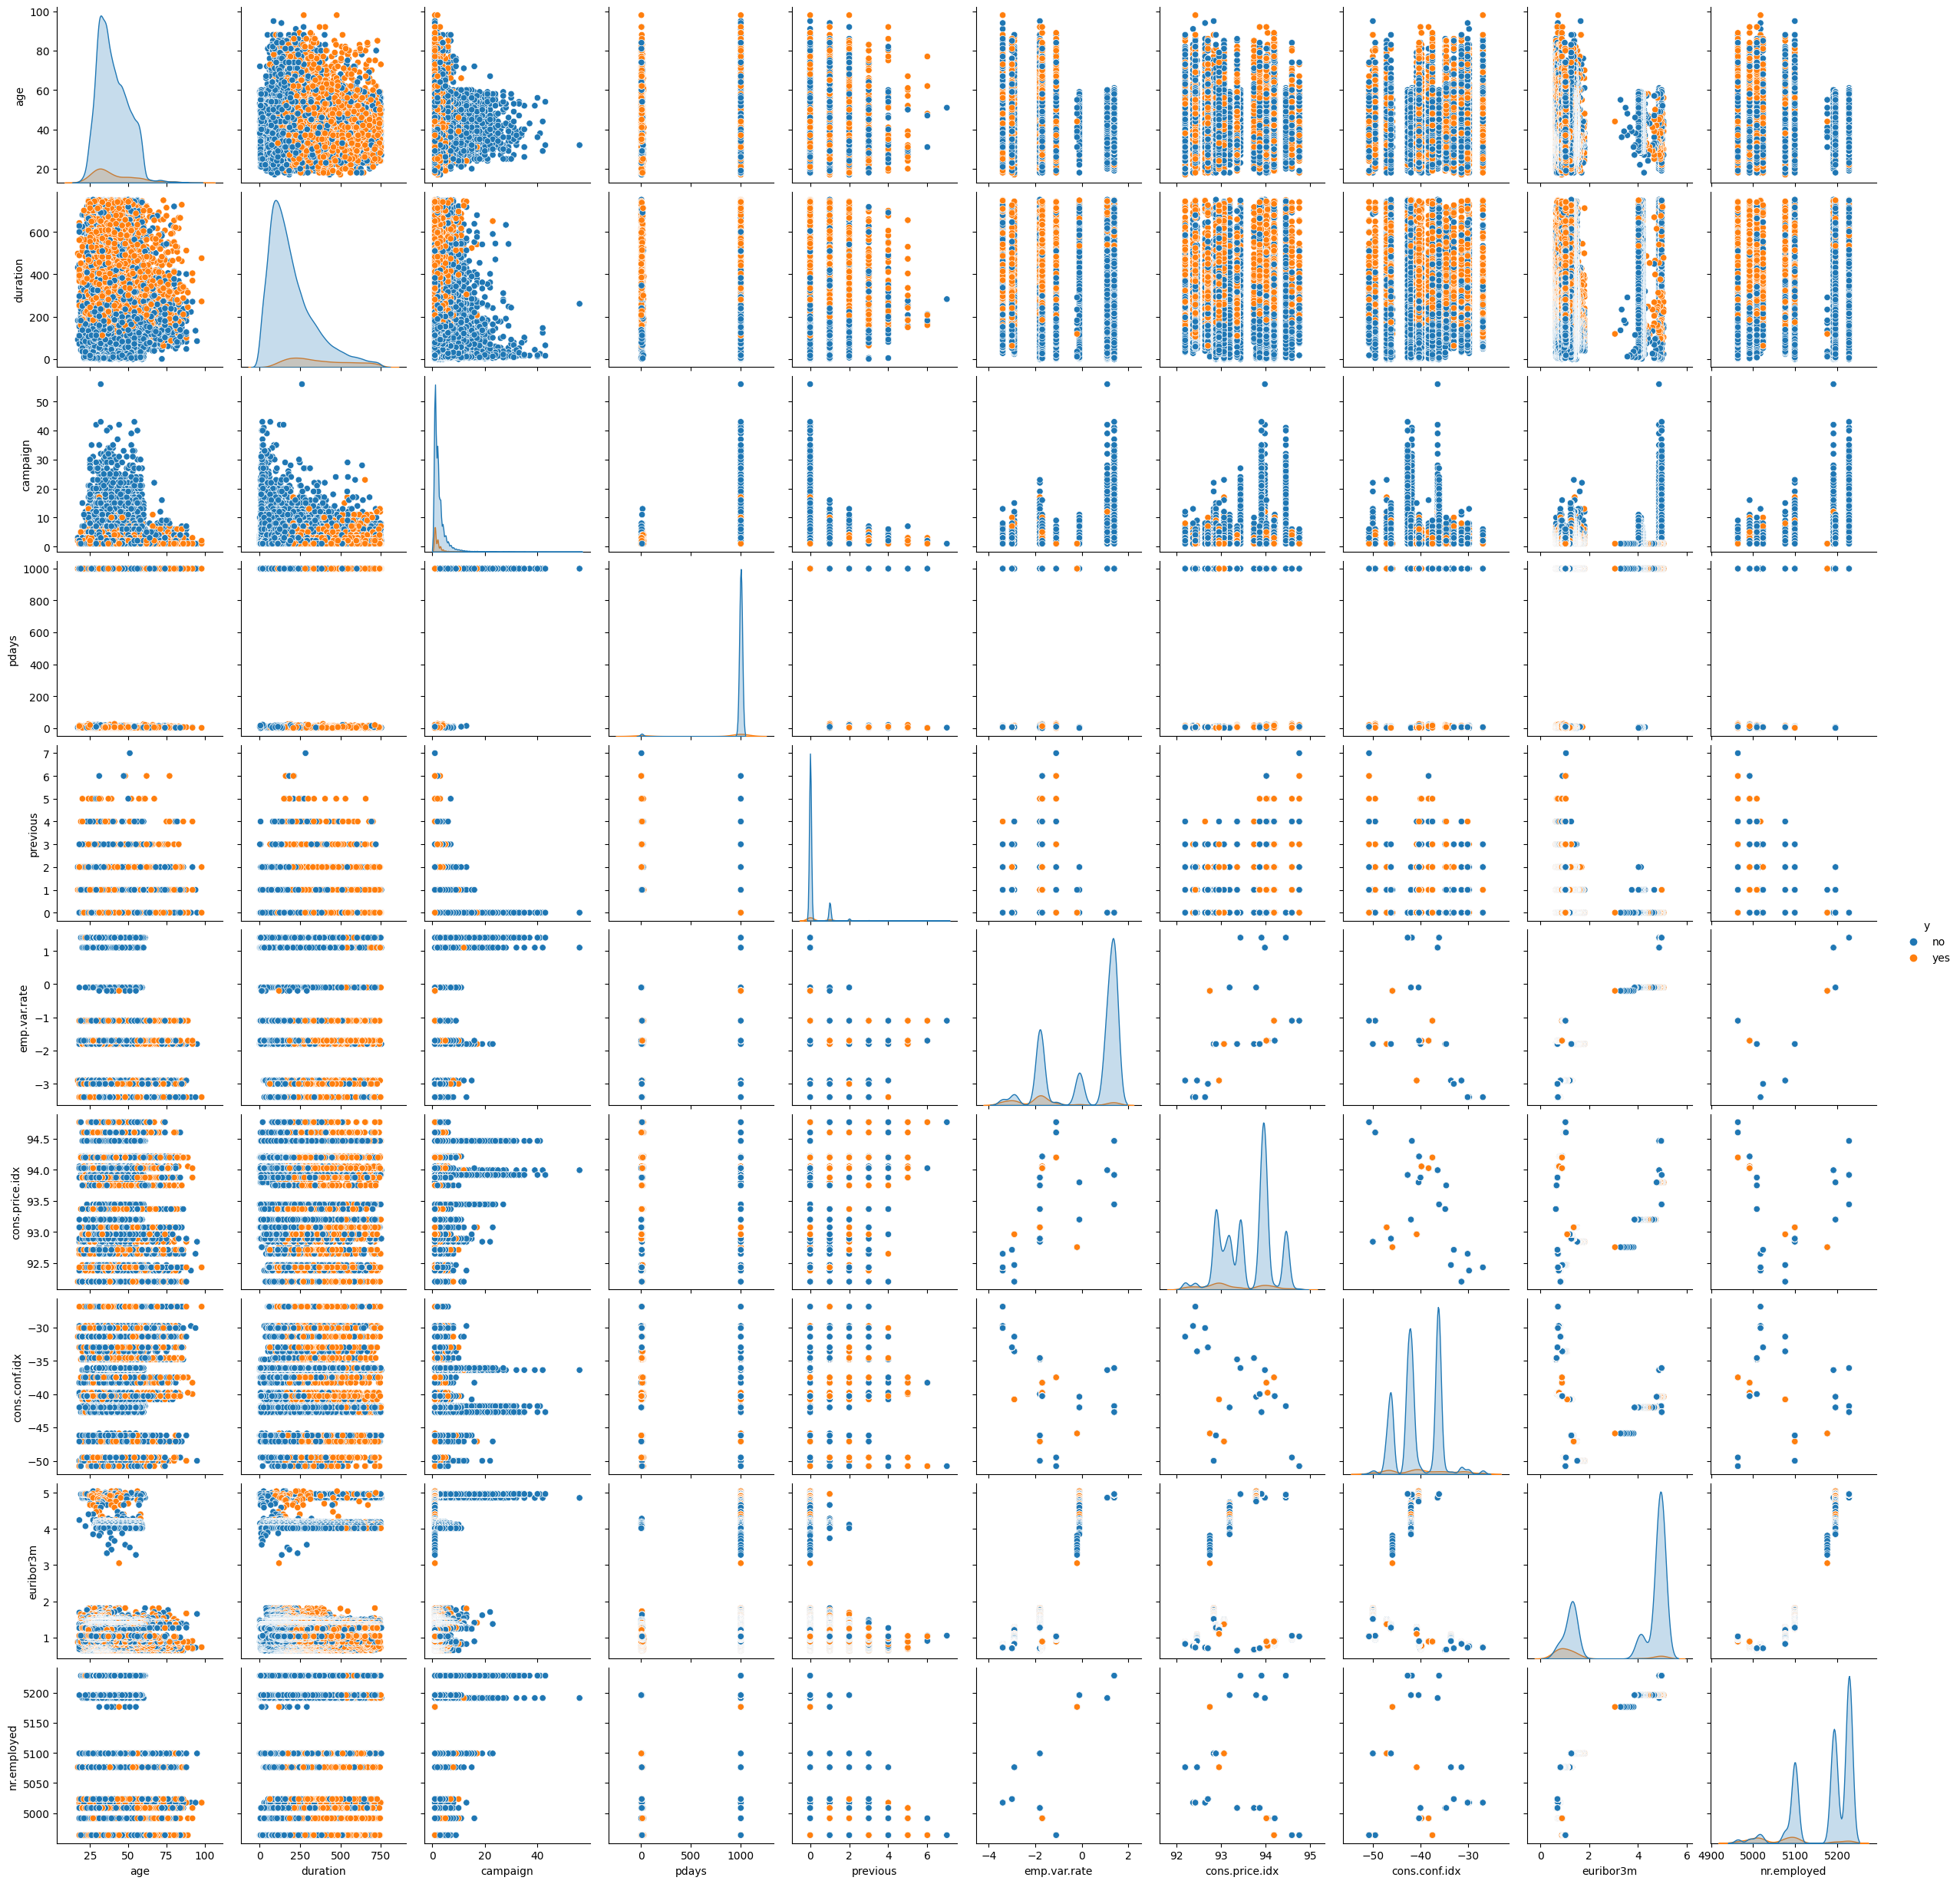

In [64]:
sns.pairplot(df_new, hue = 'y')
plt.show()

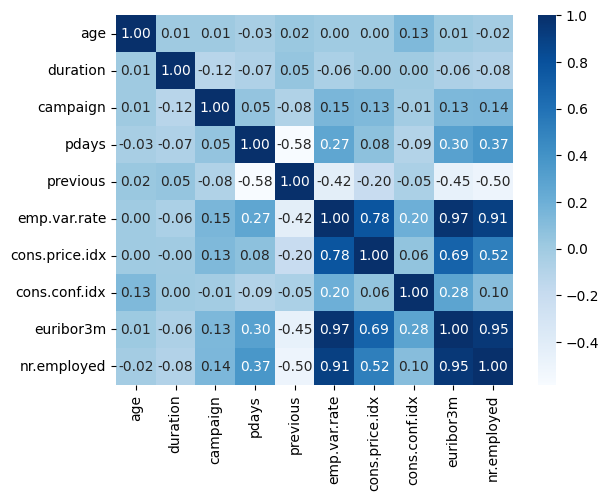

In [65]:
sns.heatmap(df_new[list].corr(), annot = True, cmap='Blues', fmt = ".2f")
plt.show()


In [66]:
df_new.corr()


age  duration  campaign     pdays  previous  \
age             1.000000  0.005898  0.005264 -0.034707  0.022974   
duration        0.005898  1.000000 -0.115742 -0.073413  0.046560   
campaign        0.005264 -0.115742  1.000000  0.052119 -0.079564   
pdays          -0.034707 -0.073413  0.052119  1.000000 -0.583379   
previous        0.022974  0.046560 -0.079564 -0.583379  1.000000   
emp.var.rate    0.002030 -0.055697  0.150408  0.268993 -0.419540   
cons.price.idx  0.002295 -0.003930  0.128141  0.077984 -0.202417   
cons.conf.idx   0.129829  0.000855 -0.013926 -0.091768 -0.052984   
euribor3m       0.013297 -0.063273  0.134801  0.295035 -0.453834   
nr.employed    -0.015037 -0.082726  0.143849  0.370882 -0.500873   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                 0.002030        0.002295       0.129829   0.013297   
duration           -0.055697       -0.003930       0.000855  -0.063273   
campaign            0.150408        0.128141      -0.013926   0.134801   
pdays               0.268993        0.077984      -0.091768   0.295035   
previous           -0.419540       -0.202417      -0.052984  -0.453834   
emp.var.rate        1.000000        0.775308       0.196829   0.972243   
cons.price.idx      0.775308        1.000000       0.058157   0.688535   
cons.conf.idx       0.196829        0.058157       1.000000   0.278410   
euribor3m           0.972243        0.688535       0.278410   1.000000   
nr.employed         0.907122        0.522627       0.102087   0.945226   

                nr.employed  
age               -0.015037  
duration          -0.082726  
campaign           0.143849  
pdays              0.370882  
previous          -0.500873  
emp.var.rate       0.907122  
cons.price.idx     0.522627  
cons.conf.idx      0.102087  
euribor3m          0.945226  
nr.employed        1.000000

In [67]:
# Replacing outcomes into binary values, i.e. 1 & 0
df_new['y'] = df_new['y'].replace('yes', 1)
df_new['y'] = df_new['y'].replace('no', 0)


In [68]:
# After replacing the values
df_new['y']


0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 39128, dtype: int64

In [69]:
# pairwise correlation of columns
y_corr = df_new.corr()['y']
pd.DataFrame(y_corr)


y
age             0.038754
duration        0.314586
campaign       -0.072291
pdays          -0.365613
previous        0.261334
emp.var.rate   -0.342127
cons.price.idx -0.158802
cons.conf.idx   0.073126
euribor3m      -0.349776
nr.employed    -0.404766
y               1.000000

# Feature Engineering

In [70]:
df_new["job"] = df_new["job"].astype(str)
df_new["marital"] = df_new["marital"].astype(str)
df_new["education"] = df_new["education"].astype(str)
df_new["contact"] = df_new["contact"].astype(str)
df_new["month"] = df_new["month"].astype(str)
df_new["poutcome"] = df_new["poutcome"].astype(str)
df_new["housing"] = df_new["housing"].astype(str)
df_new["loan"] = df_new["loan"].astype(str)
df_new["day_of_week"] = df_new["day_of_week"].astype(str)

number = preprocessing.LabelEncoder()

df_new["job"] = number.fit_transform(df_new["job"])
df_new["marital"] = number.fit_transform(df_new["marital"])
df_new["education"] = number.fit_transform(df_new["education"])
df_new["default"] = number.fit_transform(df_new["default"])
df_new["contact"] = number.fit_transform(df_new["contact"])
df_new["month"] = number.fit_transform(df_new["month"])
df_new["poutcome"] = number.fit_transform(df_new["poutcome"])
df_new["housing"] = number.fit_transform(df_new["housing"])
df_new["loan"] = number.fit_transform(df_new["loan"])
df_new["day_of_week"] = number.fit_transform(df_new["day_of_week"])

In [71]:
df_new


age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                1  ...         1    999         0         1           1.1   
1                1  ...         1    999         0         1           1.1   
2                1  ...         1    999         0         1           1.1   
3                1  ...         1    999         0         1           1.1   
4                1  ...         1    999         0         1           1.1   
...            ...  ...       ...    ...       ...       ...           ...   
41183            0  ...         1    999         0         1          -1.1   
41184            0  ...         1    999         0         1          -1.1   
41185            0  ...         2    999         0         1          -1.1   
41186            0  ...         1    999         0         1          -1.1   
41187            0  ...         3    999         1         0          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0              93.994          -36.4      4.857       5191.0  0  
1              93.994          -36.4      4.857       5191.0  0  
2              93.994          -36.4      4.857       5191.0  0  
3              93.994          -36.4      4.857       5191.0  0  
4              93.994          -36.4      4.857       5191.0  0  
...               ...            ...        ...          ... ..  
41183          94.767          -50.8      1.028       4963.6  1  
41184          94.767          -50.8      1.028       4963.6  0  
41185          94.767          -50.8      1.028       4963.6  0  
41186          94.767          -50.8      1.028       4963.6  1  
41187          94.767          -50.8      1.028       4963.6  0  

[39128 rows x 21 columns]

In [72]:
df_new1 = df_new.to_csv('D:/bank_dataset_cleaned.csv',index=False)

In [73]:
pd.read_csv("D:/bank_dataset_cleaned.csv")

age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
39123   73    5        1          5        0        2     0        0      7   
39124   46    1        1          5        0        0     0        0      7   
39125   56    5        1          6        0        2     0        0      7   
39126   44    9        1          5        0        0     0        0      7   
39127   74    5        1          5        0        2     0        0      7   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                1  ...         1    999         0         1           1.1   
1                1  ...         1    999         0         1           1.1   
2                1  ...         1    999         0         1           1.1   
3                1  ...         1    999         0         1           1.1   
4                1  ...         1    999         0         1           1.1   
...            ...  ...       ...    ...       ...       ...           ...   
39123            0  ...         1    999         0         1          -1.1   
39124            0  ...         1    999         0         1          -1.1   
39125            0  ...         2    999         0         1          -1.1   
39126            0  ...         1    999         0         1          -1.1   
39127            0  ...         3    999         1         0          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0              93.994          -36.4      4.857       5191.0  0  
1              93.994          -36.4      4.857       5191.0  0  
2              93.994          -36.4      4.857       5191.0  0  
3              93.994          -36.4      4.857       5191.0  0  
4              93.994          -36.4      4.857       5191.0  0  
...               ...            ...        ...          ... ..  
39123          94.767          -50.8      1.028       4963.6  1  
39124          94.767          -50.8      1.028       4963.6  0  
39125          94.767          -50.8      1.028       4963.6  0  
39126          94.767          -50.8      1.028       4963.6  1  
39127          94.767          -50.8      1.028       4963.6  0  

[39128 rows x 21 columns]

In [74]:
# Selecting feature columns
x = df_new.drop(columns = 'y')
x


age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
0                1       261         1    999         0         1   
1                1       149         1    999         0         1   
2                1       226         1    999         0         1   
3                1       151         1    999         0         1   
4                1       307         1    999         0         1   
...            ...       ...       ...    ...       ...       ...   
41183            0       334         1    999         0         1   
41184            0       383         1    999         0         1   
41185            0       189         2    999         0         1   
41186            0       442         1    999         0         1   
41187            0       239         3    999         1         0   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0               1.1          93.994          -36.4      4.857       5191.0  
1               1.1          93.994          -36.4      4.857       5191.0  
2               1.1          93.994          -36.4      4.857       5191.0  
3               1.1          93.994          -36.4      4.857       5191.0  
4               1.1          93.994          -36.4      4.857       5191.0  
...             ...             ...            ...        ...          ...  
41183          -1.1          94.767          -50.8      1.028       4963.6  
41184          -1.1          94.767          -50.8      1.028       4963.6  
41185          -1.1          94.767          -50.8      1.028       4963.6  
41186          -1.1          94.767          -50.8      1.028       4963.6  
41187          -1.1          94.767          -50.8      1.028       4963.6  

[39128 rows x 20 columns]

In [75]:
# Selecting the label column
y = df_new[['y']]
y

y
0      0
1      0
2      0
3      0
4      0
...   ..
41183  1
41184  0
41185  0
41186  1
41187  0

[39128 rows x 1 columns]

In [76]:
# Checking the Multicollinearity with the help of Variance Inflation Factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [77]:
print(vif_data)

           feature           VIF
0              age     19.834950
1              job      2.121308
2          marital      5.708141
3        education      4.602662
4          default      1.408399
5          housing      2.208459
6             loan      1.207407
7          contact      2.860636
8            month      6.810899
9      day_of_week      3.082190
10        duration      2.926625
11        campaign      1.929085
12           pdays    165.950600
13        previous      5.945401
14        poutcome     34.031710
15    emp.var.rate     40.140426
16  cons.price.idx  37707.038762
17   cons.conf.idx    131.133772
18       euribor3m    329.480338
19     nr.employed  43064.628542


# Observation:-

Age, and poutcome has VIF more than 10, which shows high correation between feature columns.

# Heatmap to represent the correlation between the feature columns

<AxesSubplot:>

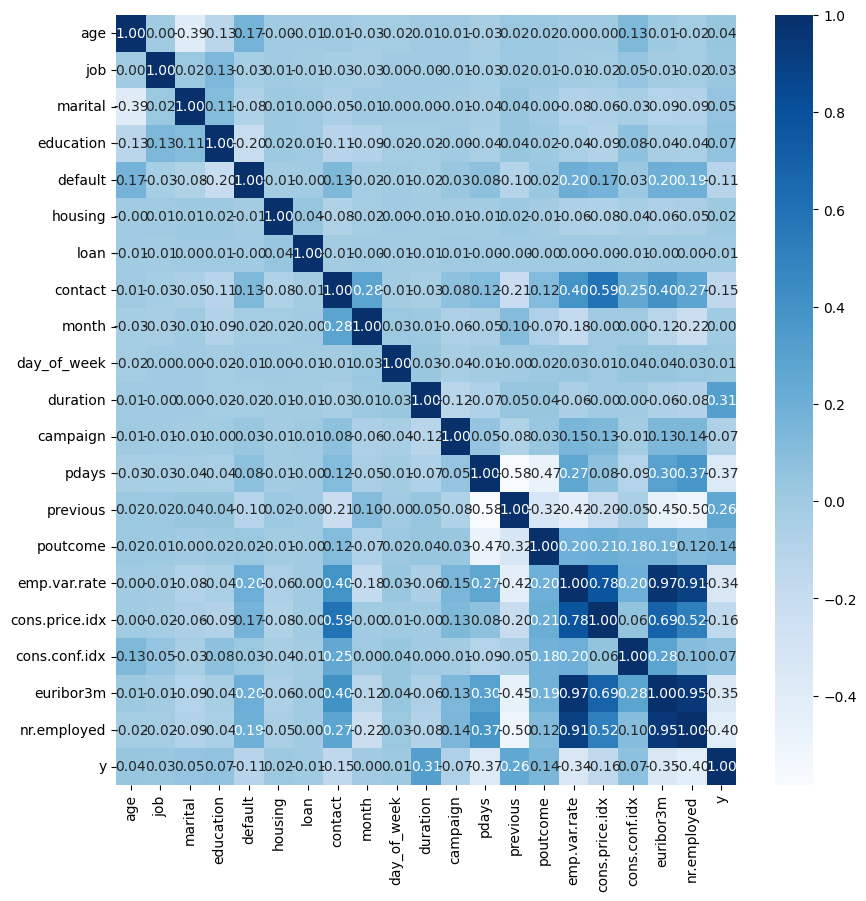

In [78]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_new[list].corr(), annot = True, cmap='Blues', fmt = ".2f", ax=ax)


# Train - Test Split

In [79]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [80]:
x_train.shape

(35215, 20)

In [81]:
x_train.shape, y_train.shape

((35215, 20), (35215, 1))

In [82]:
x_test.shape, y_test.shape

((3913, 20), (3913, 1))

In [83]:
# Applying the standard scaler on feature columns
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
 

In [84]:
x_train

array([[ 1.0516006 , -0.7583021 , -0.27929674, ...,  0.94980027,
         0.77264947,  0.84584227],
       [-0.96300602, -1.03620993, -0.27929674, ..., -0.47614804,
         0.77322645,  0.84584227],
       [-0.09960318, -1.03620993,  1.37622164, ...,  0.88498443,
         0.71091186,  0.33108504],
       ...,
       [-0.29147048,  0.90914493, -0.27929674, ...,  0.04237862,
        -1.60222904, -2.43556163],
       [-0.09960318, -0.7583021 , -0.27929674, ...,  0.88498443,
         0.71148884,  0.33108504],
       [-0.57927143,  0.90914493, -0.27929674, ..., -0.47614804,
         0.77322645,  0.84584227]])

In [85]:
x_test

array([[ 1.62720249, -1.03620993, -0.27929674, ...,  0.64732638,
        -1.58030354, -2.82405765],
       [ 0.76379966, -1.03620993, -1.93481511, ...,  0.88498443,
         0.71206583,  0.33108504],
       [-1.15487332, -1.03620993,  1.37622164, ..., -0.06564777,
        -1.36335642, -1.26174865],
       ...,
       [ 0.38006506, -0.7583021 , -0.27929674, ...,  0.88498443,
         0.71206583,  0.33108504],
       [ 0.18819776,  1.46496061, -1.93481511, ...,  0.94980027,
         0.77438043,  0.84584227],
       [ 0.28413141,  0.07542142, -0.27929674, ...,  0.94980027,
         0.77380344,  0.84584227]])

In [86]:
# Dataframe after standard scaler
df_new_scaler = pd.DataFrame(scaler.fit_transform(df_new))
df_new_scaler


0         1         2         3         4         5         6   \
0      1.530856 -0.203109 -0.277672 -1.781870 -0.513758 -1.088856 -0.451667   
1      1.626744  0.908472 -0.277672 -0.340370  1.944639 -1.088856 -0.451667   
2     -0.291014  0.908472 -0.277672 -0.340370 -0.513758  0.941150 -0.451667   
3     -0.003350 -1.036795 -0.277672 -1.301370 -0.513758 -1.088856 -0.451667   
4      1.530856  0.908472 -0.277672 -0.340370 -0.513758 -1.088856  2.315983   
...         ...       ...       ...       ...       ...       ...       ...   
39123  3.160950  0.352682 -0.277672  0.620629 -0.513758  0.941150 -0.451667   
39124  0.571977 -0.758900 -0.277672  0.620629 -0.513758 -1.088856 -0.451667   
39125  1.530856  0.352682 -0.277672  1.101129 -0.513758  0.941150 -0.451667   
39126  0.380202  1.464263 -0.277672  0.620629 -0.513758 -1.088856 -0.451667   
39127  3.256838  0.352682 -0.277672  0.620629 -0.513758  0.941150 -0.451667   

             7         8         9   ...        11        12        13  \
0      1.313819  0.761790 -0.717169  ... -0.561951  0.194126 -0.349925   
1      1.313819  0.761790 -0.717169  ... -0.561951  0.194126 -0.349925   
2      1.313819  0.761790 -0.717169  ... -0.561951  0.194126 -0.349925   
3      1.313819  0.761790 -0.717169  ... -0.561951  0.194126 -0.349925   
4      1.313819  0.761790 -0.717169  ... -0.561951  0.194126 -0.349925   
...         ...       ...       ...  ...       ...       ...       ...   
39123 -0.761140  1.192937 -1.432856  ... -0.561951  0.194126 -0.349925   
39124 -0.761140  1.192937 -1.432856  ... -0.561951  0.194126 -0.349925   
39125 -0.761140  1.192937 -1.432856  ... -0.204224  0.194126 -0.349925   
39126 -0.761140  1.192937 -1.432856  ... -0.561951  0.194126 -0.349925   
39127 -0.761140  1.192937 -1.432856  ...  0.153502  0.194126  1.668335   

             14        15        16        17        18        19        20  
0      0.196018  0.648648  0.724158  0.882603  0.712791  0.332256 -0.313871  
1      0.196018  0.648648  0.724158  0.882603  0.712791  0.332256 -0.313871  
2      0.196018  0.648648  0.724158  0.882603  0.712791  0.332256 -0.313871  
3      0.196018  0.648648  0.724158  0.882603  0.712791  0.332256 -0.313871  
4      0.196018  0.648648  0.724158  0.882603  0.712791  0.332256 -0.313871  
...         ...       ...       ...       ...       ...       ...       ...  
39123  0.196018 -0.751044  2.058287 -2.226435 -1.494606 -2.817361  3.186025  
39124  0.196018 -0.751044  2.058287 -2.226435 -1.494606 -2.817361 -0.313871  
39125  0.196018 -0.751044  2.058287 -2.226435 -1.494606 -2.817361 -0.313871  
39126  0.196018 -0.751044  2.058287 -2.226435 -1.494606 -2.817361  3.186025  
39127 -2.555967 -0.751044  2.058287 -2.226435 -1.494606 -2.817361 -0.313871  

[39128 rows x 21 columns]

<AxesSubplot:>

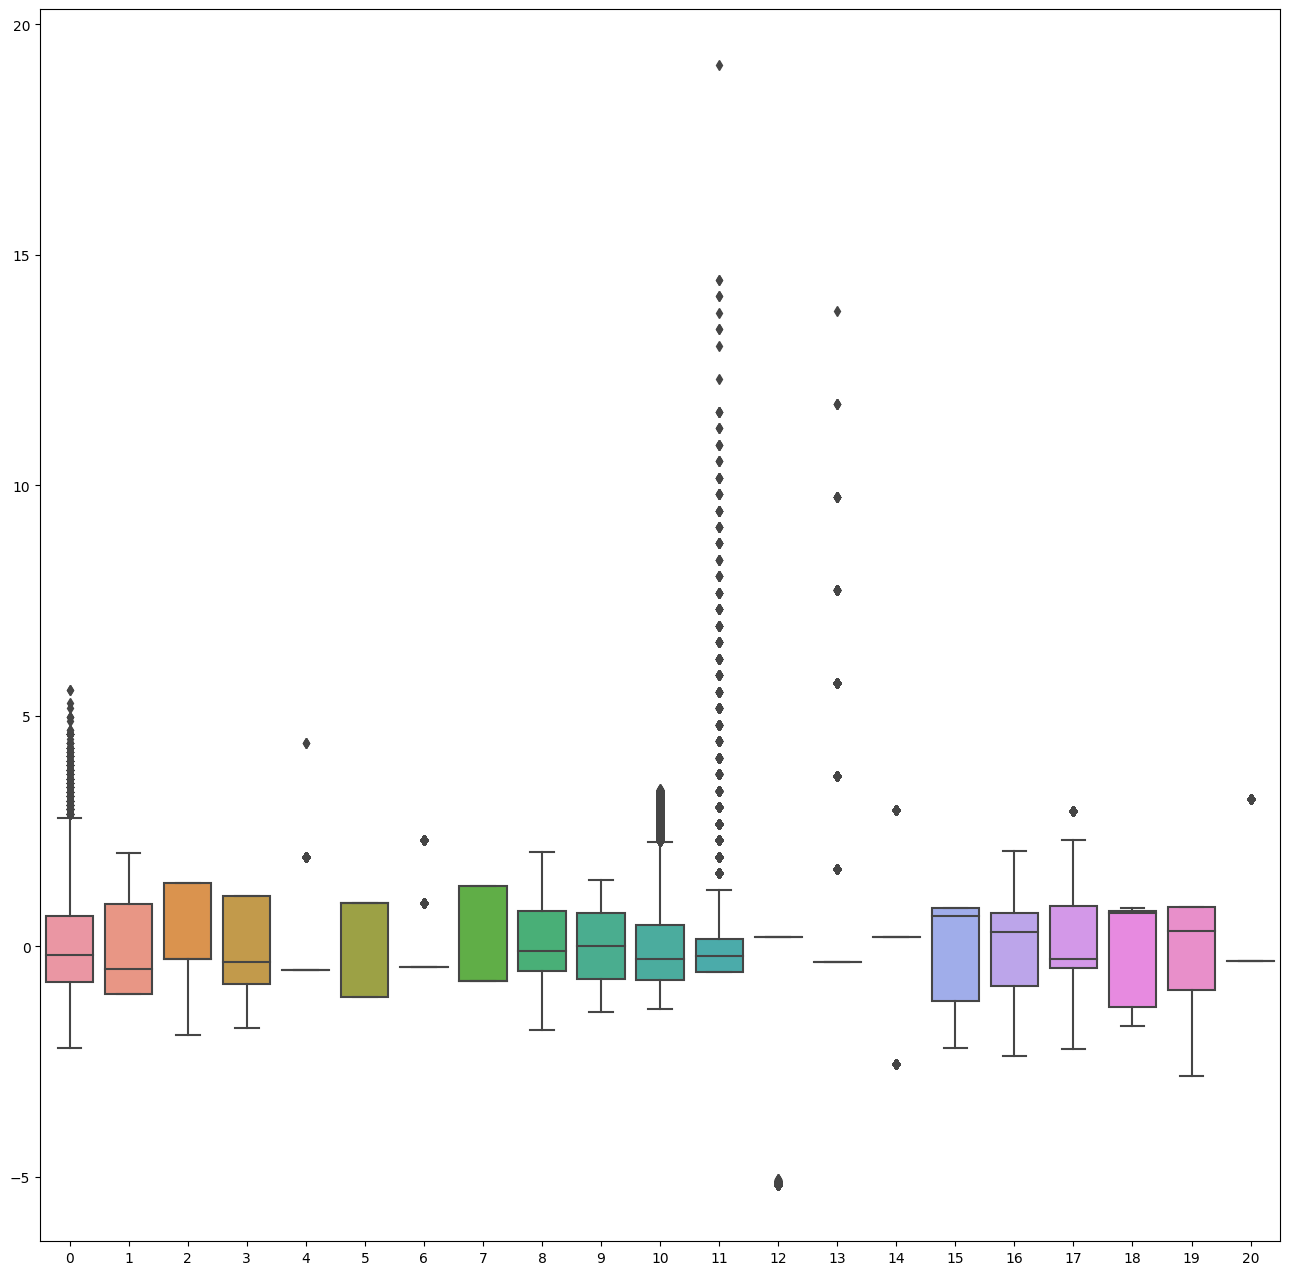

In [87]:
# Boxplot to represent the outliers in the dataset after applying standard scaler 
fig, ax = plt.subplots(figsize = (16,16))
sns.boxplot(data = df_new_scaler, ax = ax)


In [88]:
# Varience Inflation Factor after using standard scaler
def vif_score(x):
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(x_scaled, i)] for i in range(x_scaled.shape[1])],
                        columns=["FEATURE", "VIF_SCORE"])

In [89]:
vif_score(x)

FEATURE  VIF_SCORE
0              age   1.260800
1              job   1.022756
2          marital   1.204523
3        education   1.104795
4          default   1.114796
5          housing   1.012334
6             loan   1.002828
7          contact   2.327228
8            month   1.827470
9      day_of_week   1.010335
10        duration   1.027101
11        campaign   1.047896
12           pdays   5.974212
13        previous   5.306007
14        poutcome   4.524337
15    emp.var.rate  43.155688
16  cons.price.idx   9.632909
17   cons.conf.idx   3.559679
18       euribor3m  95.428902
19     nr.employed  42.790747

# Observation:-
After using standard scaler, VIF is less than 10 for all the columns and it has removed most of the outliers as well. 
Now, the dataset is good to go for the model building.

<AxesSubplot:>

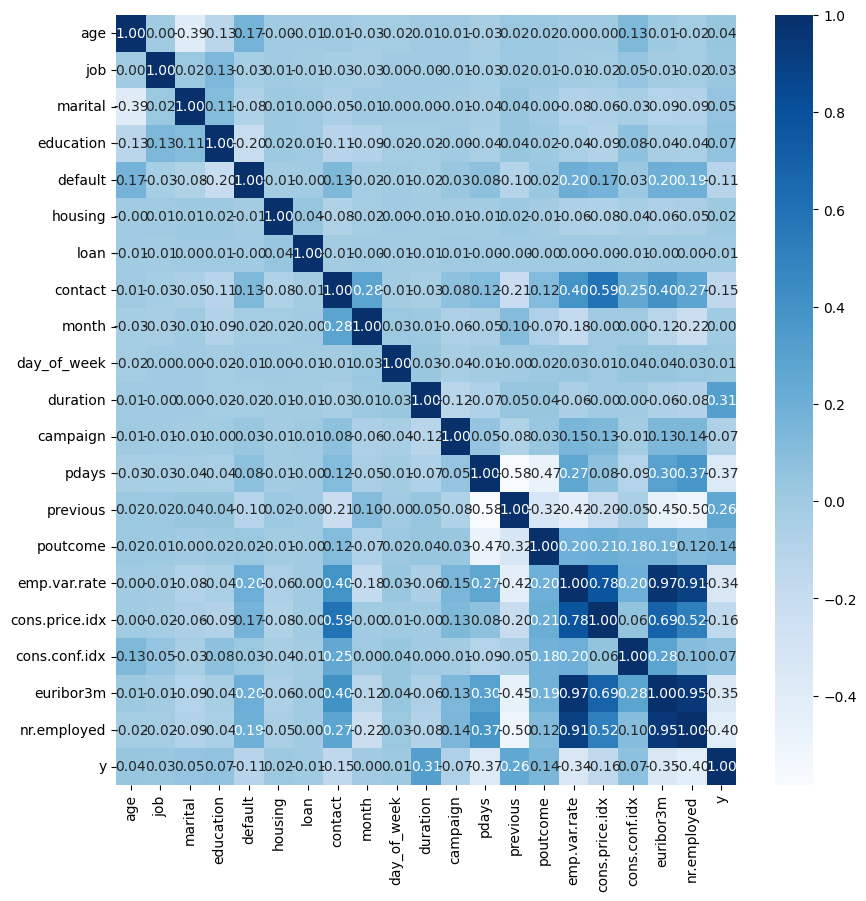

In [90]:
# Heatmap to show the correalation between feature columns after using standard scaler
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_new[list].corr(), annot = True, cmap='Blues', fmt = ".2f", ax=ax)


None of the features is correlated with "y" ( target class), thus combination of features will be used.
Training the model

# Logistic Regression Model

In [91]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

# Grid Search Modeling

In [92]:
param = ({'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C':[(10**i)*x for i in range(-4, 1) for x in [1,3,5]],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'lbfgs'],
          'max_iter' : [100,1000,2500, 5000]
})
clf = GridSearchCV(model, param_grid=param, cv=5, verbose=True, n_jobs=-1)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_)) # Finding the best parameter
print('Best score: {}'.format(clf.best_score_)) # Finding the best score

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best parameters:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.9285531733636235


# Training Logistic Regression with best parameters

In [93]:
model = LogisticRegression(C= 0.003, max_iter= 100, penalty= 'l2', solver= 'liblinear')

In [94]:
model.fit(x_train, y_train)

LogisticRegression(C=0.003, solver='liblinear')

# Regression Analysis/Predictions

In [95]:
model.score(x_test, y_test)

0.9299769997444416

In [96]:
pred = model.predict(x_test)

In [97]:
print(accuracy_score(y_test, pred))
print(recall_score(y_test, pred))
print(precision_score(y_test, pred))
print(f1_score(y_test, pred))
print(roc_auc_score(y_test, pred))

0.9299769997444416
0.37091988130563797
0.6684491978609626
0.47709923664122134
0.676791036849687


In [98]:
# confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[3514,   62],
       [ 212,  125]], dtype=int64)

<AxesSubplot:>

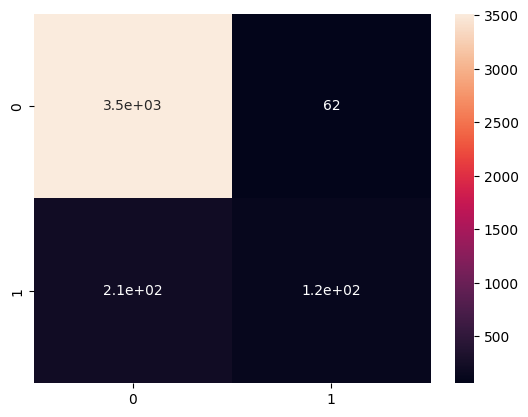

In [99]:
sns.heatmap(cm, annot=True)

In [100]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3576
           1       0.67      0.37      0.48       337

    accuracy                           0.93      3913
   macro avg       0.81      0.68      0.72      3913
weighted avg       0.92      0.93      0.92      3913



In [101]:
# Storing the model in file = 'logistic_reg.pkl'
pickle.dump(model, open('logistic_reg.pkl','wb'))

# XgBoost

In [102]:
# importing xgboost
import optuna
import xgboost as xgb

In [103]:
# Train - Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = .20 )

In [104]:
# Applying the standard scaler on feature columns
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

import pickle


In [105]:
xgb_classification = xgb.XGBClassifier()
xgb_classification.fit(x_train , y_train, eval_set  = [(x_test, y_test)])

[0]	validation_0-logloss:0.48757
[1]	validation_0-logloss:0.37854
[2]	validation_0-logloss:0.30850
[3]	validation_0-logloss:0.26313
[4]	validation_0-logloss:0.23201
[5]	validation_0-logloss:0.21107
[6]	validation_0-logloss:0.19682
[7]	validation_0-logloss:0.18481
[8]	validation_0-logloss:0.17667
[9]	validation_0-logloss:0.17142
[10]	validation_0-logloss:0.16733
[11]	validation_0-logloss:0.16506
[12]	validation_0-logloss:0.16322
[13]	validation_0-logloss:0.16187
[14]	validation_0-logloss:0.16082
[15]	validation_0-logloss:0.15974
[16]	validation_0-logloss:0.15891
[17]	validation_0-logloss:0.15869
[18]	validation_0-logloss:0.15991
[19]	validation_0-logloss:0.15962
[20]	validation_0-logloss:0.15963
[21]	validation_0-logloss:0.15975
[22]	validation_0-logloss:0.15978
[23]	validation_0-logloss:0.15983
[24]	validation_0-logloss:0.15980
[25]	validation_0-logloss:0.16006
[26]	validation_0-logloss:0.16017
[27]	validation_0-logloss:0.16018
[28]	validation_0-logloss:0.16014
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [106]:
def objective_classification(trial):
    
    param  = {
        'verbosity' : 3, 
        'booster' : trial.suggest_categorical('booster' , ['dart' , 'gbtree','gblinear']),
        'lambda' : trial.suggest_float('lambda' , 1e-4 , 1),
        'alpha' :trial.suggest_float('alpha' , 1e-4 , 1),
        'subsample' : trial.suggest_float('subsample' , .1,.5),
        'colsample_bytree' : trial.suggest_float('colsample_bytree' , .1 ,.5)
        
    }
   
    if param['booster'] in ['gbtree' , 'dart']:
        param['gamma'] :trial.suggest_float('gamma' , 1e-3 , 4 )
        param['eta'] : trial.suggest_float('eta' , .001 ,5 )
        
    xgb_classification = xgb.XGBClassifier(**param)
    xgb_classification.fit(x_train, y_train, eval_set  = [(x_test, y_test)])
    pred = xgb_classification.predict(x_test)
    accuracy  = xgb_classification.score(x_test, y_test)

    return accuracy

In [107]:
xgb_classification_oputuna = optuna.create_study(direction  = 'minimize')
xgb_classification_oputuna.optimize(objective_classification , n_trials = 10 )

[I 2023-01-18 17:06:38,793] A new study created in memory with name: no-name-cc3104c4-db29-4c66-a59b-5c67d9dc379e


[17:06:38] DEBUG: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[17:06:38] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[0]	validation_0-logloss:0.49095
[17:06:38] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[1]	validation_0-logloss:0.38452
[17:06:38] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-logloss:0.32172
[17:06:38] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[3]	validation_0-logloss:0.27253
[17:06:38] INFO: C:/Users/administrator/workspace/xgboost-wi

[I 2023-01-18 17:06:41,276] Trial 0 finished with value: 0.9232047022744697 and parameters: {'booster': 'gbtree', 'lambda': 0.35258205782183144, 'alpha': 0.7634437706051138, 'subsample': 0.45994849299234586, 'colsample_bytree': 0.3925309948037986}. Best is trial 0 with value: 0.9232047022744697.



[17:06:41] PredictRaw: 0.199131s, 100 calls @ 199131us

[17:06:41] UpdateOneIter: 1.77015s, 100 calls @ 1770153us

[17:06:41] ======== Monitor (0): GBTree ========
[17:06:41] BoostNewTrees: 1.48317s, 100 calls @ 1483171us

[17:06:41] CommitModel: 7.5e-05s, 100 calls @ 75us

[17:06:41] ======== Monitor (0): TreePruner ========
[17:06:41] PrunerUpdate: 0.036366s, 100 calls @ 36366us

[17:06:41] ======== Monitor (0): Learner ========
[17:06:41] Configure: 0.000769s, 1 calls @ 769us

[17:06:41] ======== Monitor (0): GBTree ========
[17:06:41] ======== Monitor (0): TreePruner ========
[17:06:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if y

[I 2023-01-18 17:06:42,222] Trial 1 finished with value: 0.9113212369026322 and parameters: {'booster': 'gblinear', 'lambda': 0.40617252386908714, 'alpha': 0.08645213318889201, 'subsample': 0.3791052198620579, 'colsample_bytree': 0.12768923694009857}. Best is trial 1 with value: 0.9113212369026322.


[17:06:42] ======== Monitor (0): Learner ========
[17:06:42] Configure: 0.000614s, 1 calls @ 614us

[17:06:42] EvalOneIter: 0.089775s, 100 calls @ 89775us

[17:06:42] GetGradient: 0.038869s, 100 calls @ 38869us

[17:06:42] PredictRaw: 0.090659s, 100 calls @ 90659us

[17:06:42] UpdateOneIter: 0.425184s, 100 calls @ 425184us

[17:06:42] ======== Monitor (0): GBLinear ========
[17:06:42] DoBoost: 0.294476s, 100 calls @ 294476us

[17:06:42] PredictBatch: 0.123378s, 200 calls @ 123378us

[17:06:42] PredictBatchInternal: 0.123067s, 200 calls @ 123067us

[17:06:42] ======== Monitor (0): Learner ========
[17:06:42] Configure: 0.000332s, 1 calls @ 332us

[17:06:42] ======== Monitor (0): GBLinear ========
[17:06:42] PredictBatch: 0.000253s, 2 calls @ 253us

[17:06:42] PredictBatchInternal: 0.000249s, 2 calls @ 249us

[17:06:42] DEBUG: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[17:06:42] INFO: C:/Users/administrator/workspace/xgboost-

[I 2023-01-18 17:06:53,638] Trial 2 finished with value: 0.9240991566572961 and parameters: {'booster': 'dart', 'lambda': 0.9457001045899864, 'alpha': 0.8026357140402256, 'subsample': 0.35768385176977, 'colsample_bytree': 0.2514843339911017}. Best is trial 1 with value: 0.9113212369026322.


[17:06:53] ======== Monitor (0): Learner ========
[17:06:53] Configure: 0.000816s, 1 calls @ 816us

[17:06:53] ======== Monitor (0): GBTree ========
[17:06:53] ======== Monitor (0): TreePruner ========
[17:06:53] DEBUG: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[17:06:53] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[17:06:53] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[0]	validation_0-logloss:0.49203
[17:06:53] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:06:53] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[1]	validation_0-logloss:0.38077
[17:06:53] INFO

[I 2023-01-18 17:07:04,710] Trial 3 finished with value: 0.9194991055456172 and parameters: {'booster': 'dart', 'lambda': 0.6146630491423648, 'alpha': 0.20549149068550795, 'subsample': 0.16336518575178838, 'colsample_bytree': 0.3999734960450376}. Best is trial 1 with value: 0.9113212369026322.


[17:07:04] ======== Monitor (0): Learner ========
[17:07:04] Configure: 0.00078s, 1 calls @ 780us

[17:07:04] ======== Monitor (0): GBTree ========
[17:07:04] ======== Monitor (0): TreePruner ========
[17:07:04] DEBUG: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[17:07:04] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[17:07:04] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[0]	validation_0-logloss:0.50280
[17:07:04] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[17:07:04] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[1]	validation_0-logloss:0.38924
[17:07:04] INFO:

[I 2023-01-18 17:07:16,116] Trial 4 finished with value: 0.9266547406082289 and parameters: {'booster': 'dart', 'lambda': 0.8406111258262753, 'alpha': 0.43792306240822815, 'subsample': 0.4746973559023375, 'colsample_bytree': 0.15076253297803072}. Best is trial 1 with value: 0.9113212369026322.


[17:07:16] ======== Monitor (0): Learner ========
[17:07:16] Configure: 0.000458s, 1 calls @ 458us

[17:07:16] ======== Monitor (0): GBTree ========
[17:07:16] ======== Monitor (0): TreePruner ========
[17:07:16] DEBUG: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[17:07:16] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[0]	validation_0-logloss:0.52125
[17:07:16] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-logloss:0.40899
[17:07:16] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-logloss:0.34815
[17:07:16] INFO: C:/Users/administrator/workspace/xgboost-win64_

[I 2023-01-18 17:07:17,075] Trial 5 finished with value: 0.9286992077689752 and parameters: {'booster': 'gbtree', 'lambda': 0.619404852419882, 'alpha': 0.311462977323369, 'subsample': 0.1471817755998994, 'colsample_bytree': 0.14149651173928546}. Best is trial 1 with value: 0.9113212369026322.


[17:07:17] ======== Monitor (0): Learner ========
[17:07:17] Configure: 0.000469s, 1 calls @ 469us

[17:07:17] EvalOneIter: 0.068373s, 100 calls @ 68373us

[17:07:17] GetGradient: 0.020284s, 100 calls @ 20284us

[17:07:17] PredictRaw: 0.147572s, 100 calls @ 147572us

[17:07:17] UpdateOneIter: 0.628931s, 100 calls @ 628931us

[17:07:17] ======== Monitor (0): GBTree ========
[17:07:17] BoostNewTrees: 0.458603s, 100 calls @ 458603us

[17:07:17] CommitModel: 5.1e-05s, 100 calls @ 51us

[17:07:17] ======== Monitor (0): TreePruner ========
[17:07:17] PrunerUpdate: 0.018283s, 100 calls @ 18283us

[17:07:17] ======== Monitor (0): Learner ========
[17:07:17] Configure: 0.000344s, 1 calls @ 344us

[17:07:17] ======== Monitor (0): GBTree ========
[17:07:17] ======== Monitor (0): TreePruner ========
[17:07:17] DEBUG: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[17:07:17] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/

[I 2023-01-18 17:07:18,176] Trial 6 finished with value: 0.9244824942499361 and parameters: {'booster': 'gbtree', 'lambda': 0.4062185885711401, 'alpha': 0.21724041310956385, 'subsample': 0.2848829705717357, 'colsample_bytree': 0.19951499768484127}. Best is trial 1 with value: 0.9113212369026322.


[17:07:18] ======== Monitor (0): Learner ========
[17:07:18] Configure: 0.000422s, 1 calls @ 422us

[17:07:18] EvalOneIter: 0.062834s, 100 calls @ 62834us

[17:07:18] GetGradient: 0.02381s, 100 calls @ 23810us

[17:07:18] PredictRaw: 0.14509s, 100 calls @ 145090us

[17:07:18] UpdateOneIter: 0.75386s, 100 calls @ 753860us

[17:07:18] ======== Monitor (0): GBTree ========
[17:07:18] BoostNewTrees: 0.582687s, 100 calls @ 582687us

[17:07:18] CommitModel: 5e-05s, 100 calls @ 50us

[17:07:18] ======== Monitor (0): TreePruner ========
[17:07:18] PrunerUpdate: 0.01878s, 100 calls @ 18780us

[17:07:18] ======== Monitor (0): Learner ========
[17:07:18] Configure: 0.000356s, 1 calls @ 356us

[17:07:18] ======== Monitor (0): GBTree ========
[17:07:18] ======== Monitor (0): TreePruner ========
[17:07:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with s

[I 2023-01-18 17:07:18,691] Trial 7 finished with value: 0.9113212369026322 and parameters: {'booster': 'gblinear', 'lambda': 0.8621878182742869, 'alpha': 0.042156262970488176, 'subsample': 0.42034523773019883, 'colsample_bytree': 0.3748228448149634}. Best is trial 1 with value: 0.9113212369026322.


[17:07:18] ======== Monitor (0): Learner ========
[17:07:18] Configure: 0.000304s, 1 calls @ 304us

[17:07:18] EvalOneIter: 0.073871s, 100 calls @ 73871us

[17:07:18] GetGradient: 0.022155s, 100 calls @ 22155us

[17:07:18] PredictRaw: 0.048597s, 100 calls @ 48597us

[17:07:18] UpdateOneIter: 0.219645s, 100 calls @ 219645us

[17:07:18] ======== Monitor (0): GBLinear ========
[17:07:18] DoBoost: 0.148276s, 100 calls @ 148276us

[17:07:18] PredictBatch: 0.090327s, 200 calls @ 90327us

[17:07:18] PredictBatchInternal: 0.090162s, 200 calls @ 90162us

[17:07:18] ======== Monitor (0): Learner ========
[17:07:18] Configure: 0.000168s, 1 calls @ 168us

[17:07:18] ======== Monitor (0): GBLinear ========
[17:07:18] PredictBatch: 0.000185s, 2 calls @ 185us

[17:07:18] PredictBatchInternal: 0.000183s, 2 calls @ 183us

[17:07:18] DEBUG: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[17:07:18] INFO: C:/Users/administrator/workspace/xgboost-wi

[I 2023-01-18 17:07:19,789] Trial 8 finished with value: 0.9303603373370816 and parameters: {'booster': 'gbtree', 'lambda': 0.3263070381642258, 'alpha': 0.9571219263177186, 'subsample': 0.3030159231984776, 'colsample_bytree': 0.14294874383313239}. Best is trial 1 with value: 0.9113212369026322.



[17:07:19] GetGradient: 0.019712s, 100 calls @ 19712us

[17:07:19] PredictRaw: 0.113084s, 100 calls @ 113084us

[17:07:19] UpdateOneIter: 0.736242s, 100 calls @ 736242us

[17:07:19] ======== Monitor (0): GBTree ========
[17:07:19] BoostNewTrees: 0.601178s, 100 calls @ 601178us

[17:07:19] CommitModel: 5.3e-05s, 100 calls @ 53us

[17:07:19] ======== Monitor (0): TreePruner ========
[17:07:19] PrunerUpdate: 0.01855s, 100 calls @ 18550us

[17:07:19] ======== Monitor (0): Learner ========
[17:07:19] Configure: 0.000449s, 1 calls @ 449us

[17:07:19] ======== Monitor (0): GBTree ========
[17:07:19] ======== Monitor (0): TreePruner ========
[17:07:19] DEBUG: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[17:07:19] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[0]	validation_0-logloss:0.49189
[17:07:19] INFO: C:/Users/admi

[I 2023-01-18 17:07:20,971] Trial 9 finished with value: 0.9219269102990033 and parameters: {'booster': 'gbtree', 'lambda': 0.4846852793448182, 'alpha': 0.5872132552442941, 'subsample': 0.11965704060591423, 'colsample_bytree': 0.4279118970132457}. Best is trial 1 with value: 0.9113212369026322.


[17:07:20] ======== Monitor (0): Learner ========
[17:07:20] Configure: 0.000529s, 1 calls @ 529us

[17:07:20] EvalOneIter: 0.06669s, 100 calls @ 66690us

[17:07:20] GetGradient: 0.020221s, 100 calls @ 20221us

[17:07:20] PredictRaw: 0.111158s, 100 calls @ 111158us

[17:07:20] UpdateOneIter: 0.830677s, 100 calls @ 830677us

[17:07:20] ======== Monitor (0): GBTree ========
[17:07:20] BoostNewTrees: 0.696801s, 100 calls @ 696801us

[17:07:20] CommitModel: 5.7e-05s, 100 calls @ 57us

[17:07:20] ======== Monitor (0): TreePruner ========
[17:07:20] PrunerUpdate: 0.020712s, 100 calls @ 20712us

[17:07:20] ======== Monitor (0): Learner ========
[17:07:20] Configure: 0.000347s, 1 calls @ 347us

[17:07:20] ======== Monitor (0): GBTree ========
[17:07:20] ======== Monitor (0): TreePruner ========


In [108]:
xgb_classification_oputuna.best_trial

FrozenTrial(number=1, values=[0.9113212369026322], datetime_start=datetime.datetime(2023, 1, 18, 17, 6, 41, 276792), datetime_complete=datetime.datetime(2023, 1, 18, 17, 6, 42, 222572), params={'booster': 'gblinear', 'lambda': 0.40617252386908714, 'alpha': 0.08645213318889201, 'subsample': 0.3791052198620579, 'colsample_bytree': 0.12768923694009857}, distributions={'booster': CategoricalDistribution(choices=('dart', 'gbtree', 'gblinear')), 'lambda': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'alpha': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'subsample': FloatDistribution(high=0.5, log=False, low=0.1, step=None), 'colsample_bytree': FloatDistribution(high=0.5, log=False, low=0.1, step=None)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=1, state=TrialState.COMPLETE, value=None)

In [109]:
xgb_classification_oputuna.best_params

{'booster': 'gblinear',
 'lambda': 0.40617252386908714,
 'alpha': 0.08645213318889201,
 'subsample': 0.3791052198620579,
 'colsample_bytree': 0.12768923694009857}

In [110]:
param = xgb_classification_oputuna.best_params

In [111]:
xgb_final_class = xgb.XGBClassifier(**param)

In [112]:
xgb_final_class.fit(x_train, y_train)

[17:07:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:07:21] ======== Monitor (0): Learner ========
[17:07:21] Configure: 0.000417s, 1 calls @ 417us

[17:07:21] EvalOneIter: 0.000463s, 100 calls @ 463us

[17:07:21] GetGradient: 0.022894s, 100 calls @ 22894us

[17:07:21] PredictRaw: 0.06106s, 100 calls @ 61060us

[17:07:21] UpdateOneIter: 0.303207s, 100 calls @ 303207us

[17:07:21] ======== Monitor (0): GBLinear ========
[17:07:21] DoBoost: 0.218162s, 100 calls @ 218162us

[17:07:21] PredictBatch: 0.060947s, 100 calls @ 60947us

[17:07:21] PredictBatchInternal: 0.060829s, 100 calls @ 60829us



XGBClassifier(alpha=0.08645213318889201, base_score=0.5, booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.12768923694009857, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.40617252386908714,
              learning_rate=0.5, max_bin=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [113]:
xgb_final_class.score(x_test, y_test)

0.9113212369026322

 # Observation:-
The dataset consists of categorical and numerical features.

The dataset has 20 independent features, out of these only half of them are important.

People who are under 36 are more likely to subscribe to the term deposit of the bank.

People who have some kind of loan i.e., personal or house loan are unlikely to subscribe.

Education plays an important role, as management, technician, blue-collar and admin professionals are more likely to subscribe.

Most of the people who subscribed to the term deposit spent more than 10 minutes on the call.

Married people seemed more interested in term deposits, unlike divorced people.

During May, July and August, most people subscribed to the term deposit. Hence, the targeted audience should be addressed during the summer.

Most people made up their minds within the next 3 months after the last campaign.

The targeted audience should be contacted at least 3 times.
 

# Pickling the Model file for Deployment

In [114]:
# storing the model in file name = 'xgbmodel.pkl'
pickle.dump(xgb_final_class,open('xgbmodel.pkl' 'wb'))

In [116]:
pickled_model=pickle.load(open('xgbmodel.pkl', 'rb'))

In [117]:
pickled_model.score(x_test, y_test)

0.9113212369026322